### Project was peer-reviewed and validated by a Data Scientist
#### Training dataset is avilable at https://drive.google.com/file/d/0B7uKCGUPcNEUUjhkZXBwaE5hbFE/view
- Business objective of the project is to predict which customers would be able to pay back bank Loan.
- Objective of the project is to clean data. However, business objective was still fulfilled. Credit score, current loan amount, and annual income were high in determining which customers would be able to pay back loan.
- Two Regression models were used to predict and fill the missing values for salary and credit. Final model was constructed  with tree based classifiers.

# 1. Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Training dataset is imported that has the information which will be used to analyze the data.

In [2]:
#data_train = pd.read_csv("LoansTrainingSet.csv", dtype = {'Maximum Open Credit': float})
data_train = pd.read_csv("LoansTrainingSet.csv")
data_train.head()

C:\Users\Aniq\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


# 3. All variables are turned into lower case so the variables are consistent throughout the project and there won't be a need to alternate between upper and lower case. This step is optional.

In [3]:
data_train.columns = map(str.lower, data_train.columns)
data_train.head()

,loan id,customer id,loan status,current loan amount,term,credit score,years in current job,home ownership,annual income,purpose,monthly debt,years of credit history,months since last delinquent,number of open accounts,number of credit problems,current credit balance,maximum open credit,bankruptcies,tax liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


# 4. An underscore "_" is added to all the variables because having an underscore "_" instead of space gives the user freedom and flexibility to code a same thing in multiple ways. This step is also optional, having space will just limit the options someone will have to code something in a different way.

In [4]:
data_train.columns = [a.replace(" ", "_") for a in data_train.columns]
data_train.head()

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


# 5. Changing years in current job from object to numerical. A person who is currently in their job for 10 years is likely to be more financially stable and have a steady flow of income compared to someone who just started working. Based on this assumption that a higher number is better, object will be converted into numerical. 

# Another way to do this would be to leave this as is and not turn it into numerical, but dummies would have to be created later to turn these objects into 0 and 1.

In [5]:
data_train.years_in_current_job.unique()

array(['10+ years', '4 years', '6 years', '5 years', nan, '3 years',
       '2 years', '< 1 year', '1 year', '7 years', '9 years', '8 years'],
      dtype=object)

In [6]:
data_train.years_in_current_job.head()

0    10+ years
1      4 years
2    10+ years
3    10+ years
4      4 years
Name: years_in_current_job, dtype: object

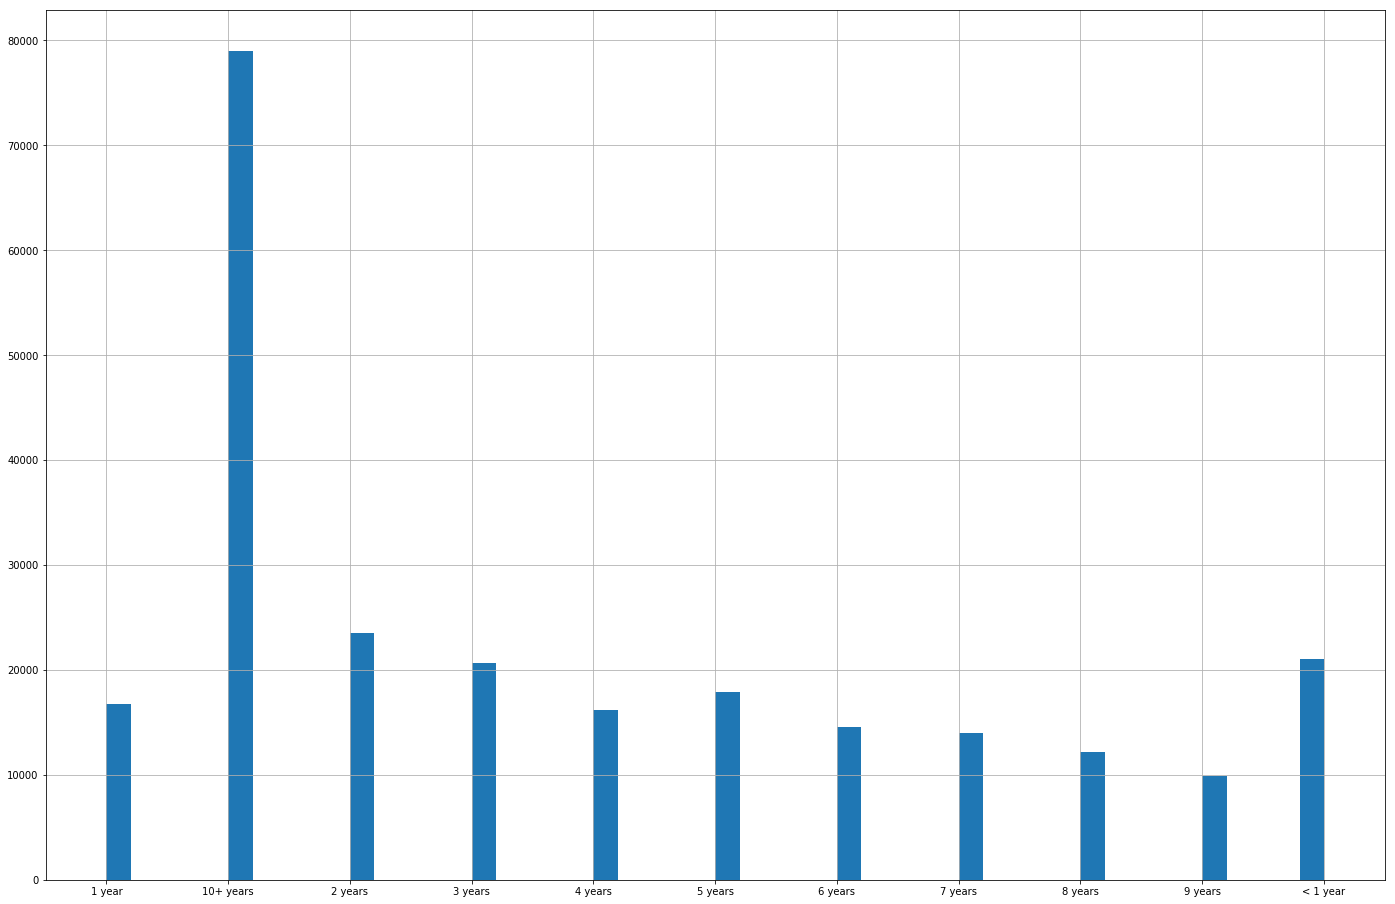

In [7]:
plt.figure(figsize=(24,16))
data_train.years_in_current_job.hist(bins = 50)
plt.figure(figsize=(6,4))

In [8]:
data_train['years_in_current_job'].replace(['10+ years'],10,inplace = True)
data_train['years_in_current_job'].replace(['4 years'],4,inplace = True)
data_train['years_in_current_job'].replace(['6 years'],6,inplace = True)
data_train['years_in_current_job'].replace(['5 years'],5,inplace = True)
data_train['years_in_current_job'].replace(['3 years'],3,inplace = True)
data_train['years_in_current_job'].replace(['2 years'],2,inplace = True)
data_train['years_in_current_job'].replace(['< 1 year'],0.5,inplace = True)
data_train['years_in_current_job'].replace(['1 year'],1,inplace = True)
data_train['years_in_current_job'].replace(['7 years'],7,inplace = True)
data_train['years_in_current_job'].replace(['9 years'],9,inplace = True)
data_train['years_in_current_job'].replace(['8 years'],8,inplace = True)

In [9]:
data_train.years_in_current_job.unique()

array([10. ,  4. ,  6. ,  5. ,  nan,  3. ,  2. ,  0.5,  1. ,  7. ,  9. ,
        8. ])

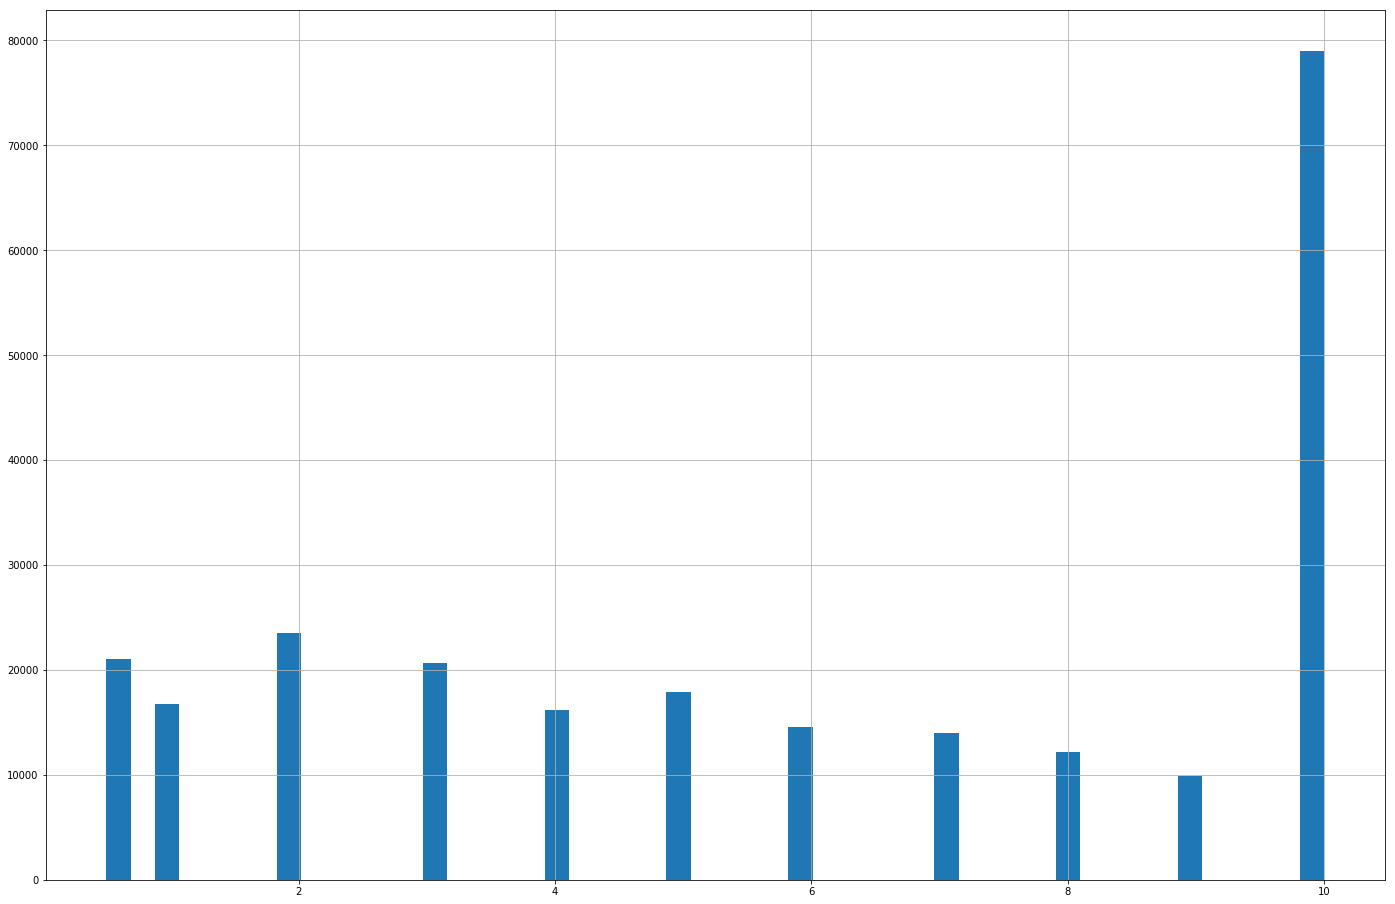

In [10]:
plt.figure(figsize=(24,16))
data_train.years_in_current_job.hist(bins = 50)
plt.figure(figsize=(6,4))

In [11]:
data_train.years_in_current_job.head()

0    10.0
1     4.0
2    10.0
3    10.0
4     4.0
Name: years_in_current_job, dtype: float64

# 6. Checking spelling – Spelling are checked here to ensure that each object is only mentioned once, and if an object is misspelled it will be considered a different value which can lead to misleading results. For instance, other and Other are same conversationally, or even in writing because they convey the same meaning. But even having a slight difference as one being titled and the other being lowercase, it makes them two different things or variables in programming and the same rules apply to DataFrame columns and information it contains.

In [12]:
data_train.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

# The above variable "loan_status" looks fine because there are only two different objects. "Fully Paid" and "Charged Off" and there are no misspelling. 

# But this object,"loan_status", will be turned into numerical or binary (0 or 1). Because this is the Target variable that becomes Y in the model. 

In [13]:
data_train['loan_status'] = data_train.loan_status.map({"Fully Paid": 1, "Charged Off": 0})

In [14]:
data_train.term.unique() # Looks fine because there are just two unique values.
# we could also turn term into binary, but we will leave it as is because we
#will turn these into dummies later on anyways.

array(['Short Term', 'Long Term'], dtype=object)

## 7.1 Checking spelling for home ownership 

In [15]:
data_train.home_ownership.unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

# HaveMortgage doesn't look right, so it will be looked at further and visualized. 

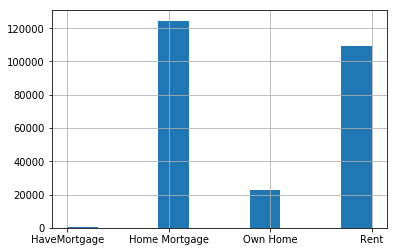

In [16]:
data_train.home_ownership.hist() 

In [18]:
print (data_train.home_ownership[data_train.home_ownership == 'HaveMortgage'].count())
print(data_train.home_ownership[data_train.home_ownership == 'Home Mortgage'].count())

574
124477


## By looking at the above histogram, HaveMortgage seems to be a typo.  
## There is no mention of HomeMortgage in Loans Dictionary file. And the dictionary only mentions 'rent', "Home Mortgage", and "Own home". But if there was no dictionary, this data can be looked at mathematically, and statistically, there are 574 people who also have HaveMortgage value and Home Mortgage looks similar to HaveMortgage. 124,477 people have Home Mortgage value. About 0.46% people have HaveMortgage value and that would be a standard rate of error and this will be changed to Home Mortgage.

In [19]:
data_train['home_ownership'].replace(['HaveMortgage'], 'Home Mortgage', inplace = True)

125051


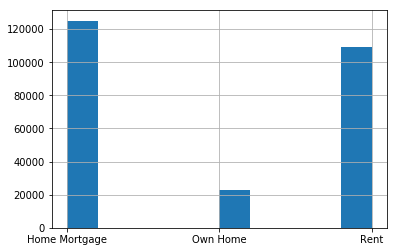

In [20]:
data_train.home_ownership.hist()
print(data_train.home_ownership[data_train.home_ownership == 'Home Mortgage'].count())

## 7.2. Checking spelling for purpose

In [21]:
data_train.purpose.unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

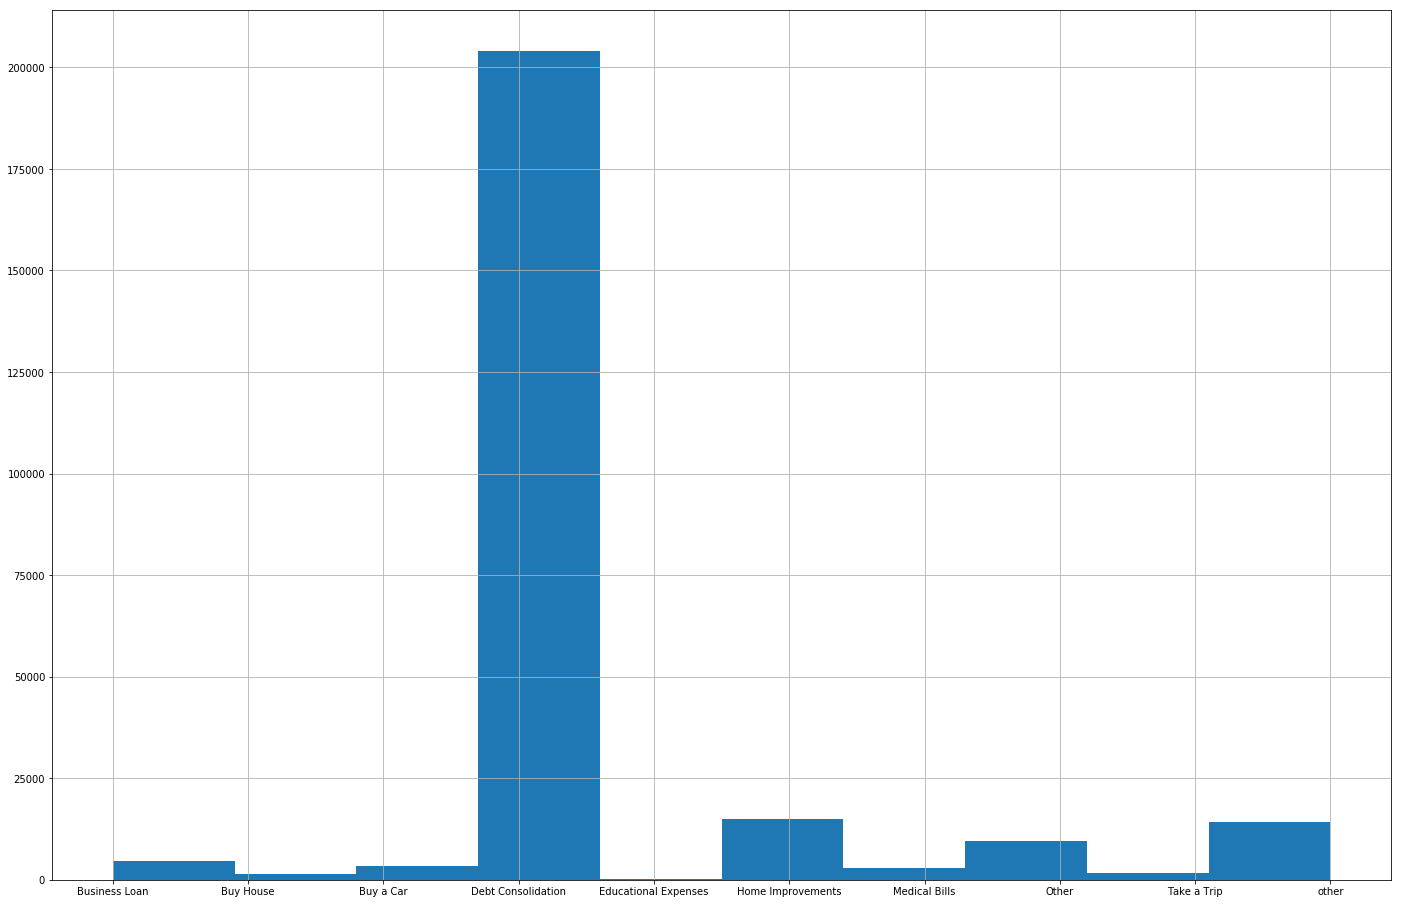

In [22]:
plt.figure(figsize=(24,16))
data_train.purpose.hist()
plt.figure(figsize=(6,4))

## "Other" is spelled two different ways. With title and lowercase. One spelling will be replaced, so there will only be one "Other" to maintain consistency.

In [23]:
data_train['purpose'].replace(['other'],'Other',inplace = True)

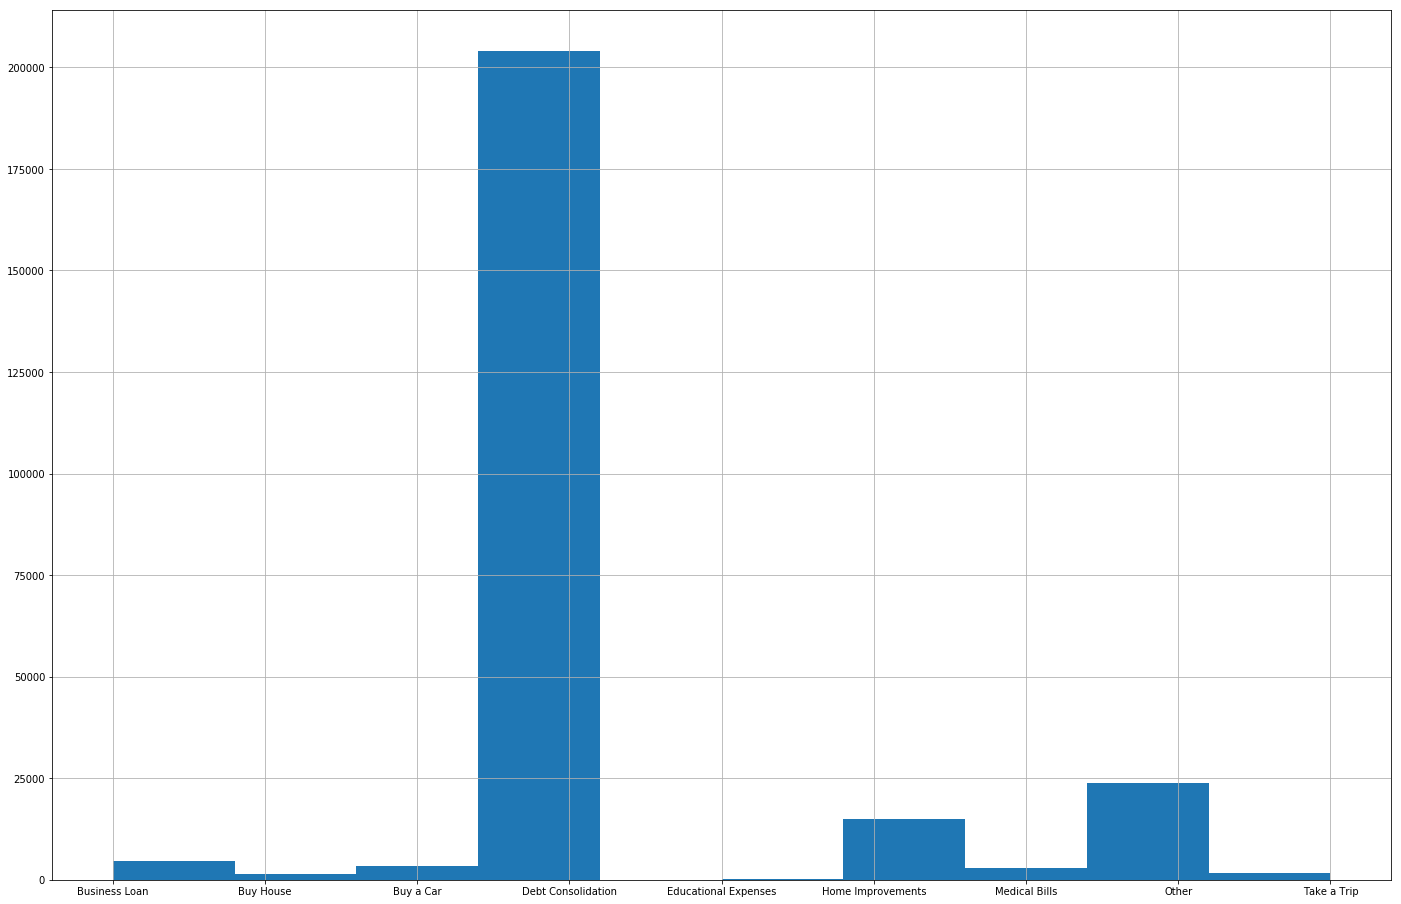

In [24]:
plt.figure(figsize=(24,16))
data_train.purpose.hist()
plt.figure(figsize=(6,4))

## 7.3. Checking errors in monthly debt

In [25]:
data_train.head()

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,Other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,Short Term,747.0,10.0,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [26]:
data_train.monthly_debt.head()

0       $584.03
1    $1,106.04 
2    $1,321.85 
3       $751.92
4       $355.18
Name: monthly_debt, dtype: object

## monthly_debt should be an integer or float, but it is recorded as object because of dollar sign and comma in the values. Comma and dollar sign will be removed from monthly debt and converted into float to account for decimal values. It’s important to convert monthly debt into float or int because a debt amount of 500,000 is more than 5,000. And this conversion will help the model in differentiating a lower debt number from a higher debt number.

In [27]:
data_train['monthly_debt'] = data_train['monthly_debt'].apply(lambda a: a[1:].split(","))
data_train['monthly_debt'] = data_train['monthly_debt'].apply(lambda a: float("".join(a)))

In [28]:
data_train.monthly_debt.head()

0     584.03
1    1106.04
2    1321.85
3     751.92
4     355.18
Name: monthly_debt, dtype: float64

## 7.4 Errors in maximum_open credit

In [29]:
data_train.head()

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,Other,1106.04,26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,Short Term,747.0,10.0,Own Home,38072.0,Debt Consolidation,751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [30]:
data_train.maximum_open_credit.head()

0    16056
1    19149
2    28335
3    43915
4    37081
Name: maximum_open_credit, dtype: object

# Maximum_open_credit is also an object. And Maximum_open_credit will also be changed to an integer or float because a higher number carries more weight than a lower number. But a number in object will be looked at as text or a string which will lose the ability to differentiate between a higher number and a lower number.  

# Dummies can be created if this variable is kept as string, but creating a dummy will be computationally expensive, model will be slow to train and it take too manyresources.

In [32]:
#data_train['maximum_open_credit'] = data_train['maximum_open_credit'].apply(lambda a: a.split("$"))
#data_train['maximum_open_credit'] = data_train['maximum_open_credit'].apply(lambda a: "".join(a))
#data_train['maximum_open_credit'] = data_train['maximum_open_credit'].apply(lambda a: int(a))

## Above code in markdown was ran to convert object into integer, but the maximum_open_credit still stayed as object because there are "#VALUE!" in that column. This "#VALUE!" error is an excel error. When multiple columns depend on each other for arithmetic operation and one of the cell is missing values or there is something wrong with the formula, excel gives this "#VALUE!" Error. But python looks at this error as string.  

## So this "#VALUE!" Error will be fixed first.

In [33]:
data_train[data_train.maximum_open_credit == "#VALUE!"]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
184662,b798f46b-e27b-4823-af83-294b1ffc3490,f61890c5-e264-4b0f-a047-9cfa03b9d182,0,1470,Short Term,NaN,2.0,Rent,NaN,Debt Consolidation,506.34,15.3,26.0,3,0,0,#VALUE!,0.0,0.0
184663,b798f46b-e27b-4823-af83-294b1ffc3490,f61890c5-e264-4b0f-a047-9cfa03b9d182,0,1470,Short Term,725.0,2.0,Rent,39200.0,Debt Consolidation,506.34,15.3,26.0,3,0,0,#VALUE!,0.0,0.0
187512,ba8f310d-7688-40e9-aa1c-30237dcaf051,80acb6ec-105f-42e4-bdd0-6c4792b88e71,0,23897,Long Term,6970.0,7.0,Home Mortgage,49785.0,Home Improvements,1306.86,13.0,NaN,6,0,0,#VALUE!,0.0,0.0
187513,ba8f310d-7688-40e9-aa1c-30237dcaf051,80acb6ec-105f-42e4-bdd0-6c4792b88e71,0,23897,Long Term,697.0,7.0,Home Mortgage,49785.0,Home Improvements,1306.86,13.0,NaN,6,0,0,#VALUE!,0.0,0.0


In [34]:
data_train.maximum_open_credit.nunique()

87188

In [35]:
data_train[(data_train.current_credit_balance == 0) & (data_train.maximum_open_credit == '0')].head()

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
164222,a367384d-6450-45ee-ad85-8d727d1c0220,93b6fbd4-74fd-444a-9e3e-5151a89341c8,1,9751,Short Term,NaN,10.0,Home Mortgage,NaN,Debt Consolidation,604.07,24.5,44.0,7,0,0,0,0.0,0.0
164271,a37266b7-4447-47a0-9bbb-6d2a874420f7,2b525b9c-d64e-4ef1-a634-b29d9a0705d6,1,10205,Short Term,746.0,4.0,Rent,127563.0,Debt Consolidation,694.15,15.5,NaN,5,0,0,0,0.0,0.0
164326,a3805864-69d8-45fd-a145-9b8f9a79037e,83368ad1-e51e-4cd5-b936-62f8df5bfe72,1,99999999,Long Term,740.0,3.0,Home Mortgage,60726.0,Debt Consolidation,477.71,20.0,26.0,7,0,0,0,0.0,0.0
164443,a39ed560-c5b5-40a7-87d4-bf17d9c98a5a,0566f8ea-6dbd-4996-bf9b-35a6e3a1136e,0,5084,Short Term,NaN,2.0,Rent,NaN,Debt Consolidation,679.45,19.2,NaN,8,0,0,0,0.0,0.0
164444,a39ed560-c5b5-40a7-87d4-bf17d9c98a5a,0566f8ea-6dbd-4996-bf9b-35a6e3a1136e,0,5084,Short Term,735.0,2.0,Rent,37923.0,Debt Consolidation,679.45,19.2,NaN,8,0,0,0,0.0,0.0


## 1561 rows have value of zero in current_credit_balance AND their maximum_open_credit is also zero. 4 rows that are not showing are likely those people whose maximum_open_credit is "#VALUE!".  maximum_open_credit "#VALUE!" will be replaced with 0 and the column will be turned into integer because of reasons mentioned earlier.

In [36]:
data_train['maximum_open_credit'].replace(['#VALUE!'],'0',inplace = True)

In [37]:
#Let's convert maximum_open_credit from string to integer
data_train['maximum_open_credit'] = data_train['maximum_open_credit'].apply(lambda a: int(a))

In [38]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
loan_id                         256984 non-null object
customer_id                     256984 non-null object
loan_status                     256984 non-null int64
current_loan_amount             256984 non-null int64
term                            256984 non-null object
credit_score                    195308 non-null float64
years_in_current_job            245508 non-null float64
home_ownership                  256984 non-null object
annual_income                   195308 non-null float64
purpose                         256984 non-null object
monthly_debt                    256984 non-null float64
years_of_credit_history         256984 non-null float64
months_since_last_delinquent    116601 non-null float64
number_of_open_accounts         256984 non-null int64
number_of_credit_problems       256984 non-null int64
current_credit_balance          256984 non-null int64
maximum_

# 8. Groupby on loan_id because some customers appear more than 1 time this will consolidate all the same loan id numbers under 1. 

#  Groupby can also be done on customer_id and the results will likely be the same. 

In [39]:
data_train.head()

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,Other,1106.04,26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,Short Term,747.0,10.0,Own Home,38072.0,Debt Consolidation,751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [40]:
data_group = data_train.groupby('loan_id').max()
data_group.head()

,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
loan_id,,,,,,,,,,,,,,,,,,
000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,Other,1106.04,26.3,NaN,17,0,6262,19149,0.0,0.0
00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,NaN,5,0,20967,28335,0.0,0.0
00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,Short Term,747.0,10.0,Own Home,38072.0,Debt Consolidation,751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [41]:
data_group.credit_score[data_group.credit_score >851] = data_group['credit_score'].apply(lambda a: a/10)

C:\Users\Aniq\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# 9. Missing values – One way to deal with the missing values is to drop the missing values, and one way of dropping missing values is to drop the entire column, so other features are not affected. Second way of dropping missing values is to drop the entire row. Dropping missing values with either method is not beneficial because important data and information is lost. Hence, these missing values will be filled to retain as much information as possible.

In [42]:
data_group.isnull().sum()[data_group.isnull().sum()>0]

credit_score                     44498
years_in_current_job              8990
annual_income                    44498
months_since_last_delinquent    118262
bankruptcies                       452
tax_liens                           22
dtype: int64

## 9.1. # Months since last delinquent is how many months has it been since the person missed their payment.

[ 41.  nan  73.  29.  43.  79.   2.  15.  27.   5.  55.  21.  56.  25.
  67.  37.  74.  45.  76.  46.  35.  60.  28.  34.  13.   7.  17.  22.
  42.  53.  12.  39.  71.  20.  38.   0.  81.  78.  44.  63.  77.  49.
  30.  70.  26.  14.   8.  52.  68.  75.  51.  59.  40.   4.  18.  47.
  24.  31.  69.  32.  36.  16.  10.  62.   9.  11.  66.  58.  54.   3.
  50.  82.  61.  72.  57.  23.  19.  80.   6.   1.  86.  48.  33.  65.
  64.  84.  83. 104.  90. 149.  96. 110.  99.  91.  95. 152.  87. 131.
 100. 116. 106. 107.  85.  89. 101. 122.  93. 135. 139.  88. 148.  92.
  94. 114. 143. 115. 108. 140. 130.  98.  97. 120. 102. 176. 151. 118.
 109. 134. 112. 113. 133. 119.]
min      0.0
max    176.0
Name: months_since_last_delinquent, dtype: float64


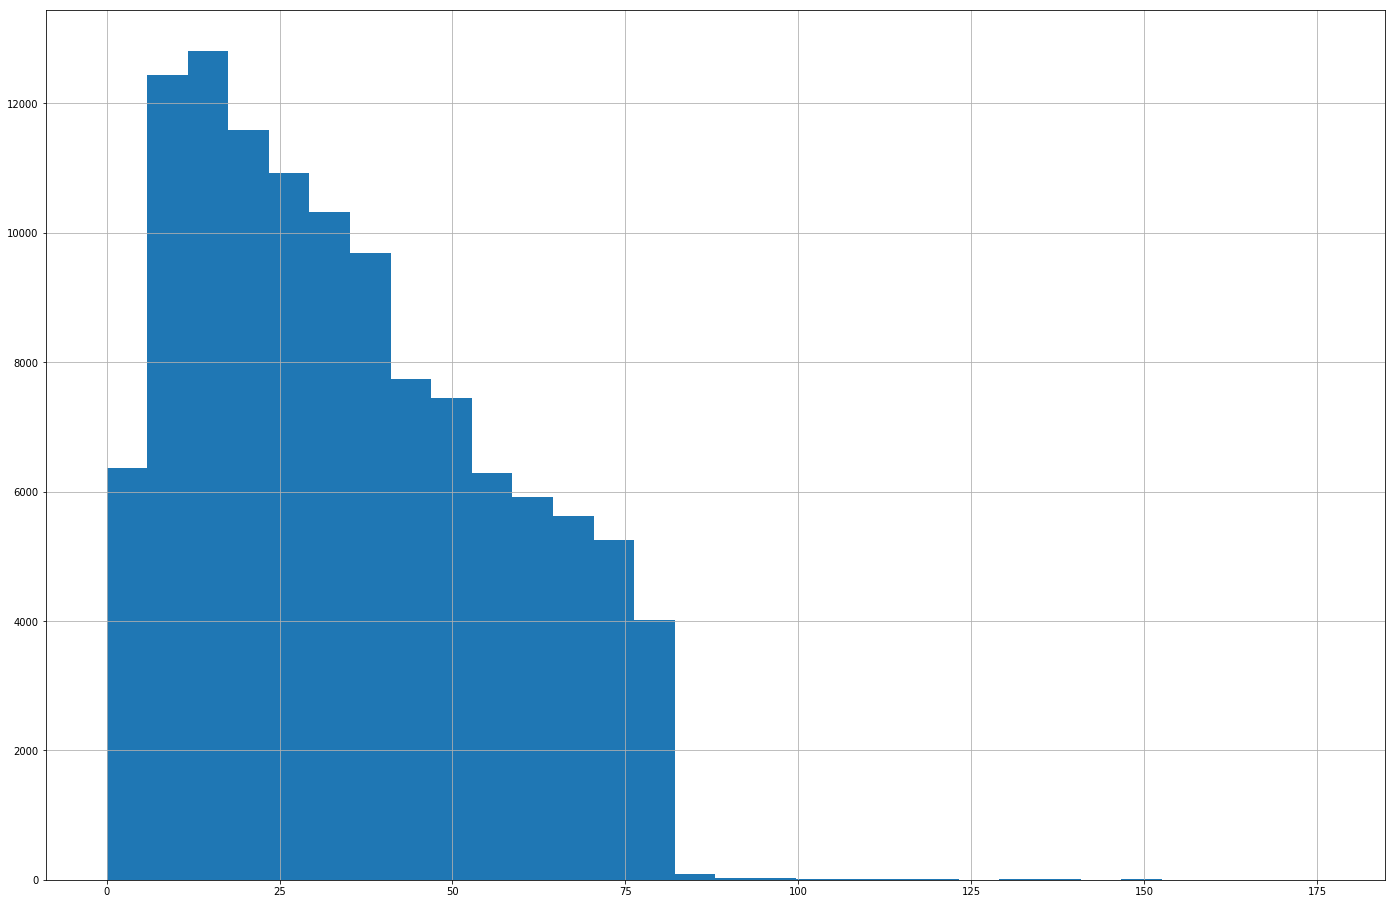

In [43]:
print(data_train.months_since_last_delinquent.unique())
print(data_train.months_since_last_delinquent.agg(('min','max')))

plt.figure(figsize=(24,16))
data_train.months_since_last_delinquent.hist(bins = 30)

plt.figure(figsize=(6,4))

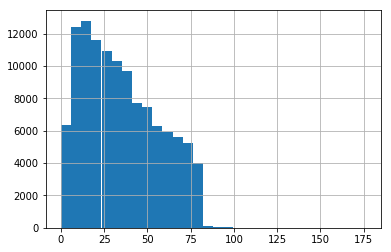

In [44]:
data_train.months_since_last_delinquent.hist(bins = 30)


In [45]:
data_train[data_train.months_since_last_delinquent >= 150]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
26239,1a2e71e0-995d-4cb8-b3d6-b5db357c0059,800ad200-d683-4c3c-9eef-604ff4ff24ba,0,9857,Short Term,729.0,10.0,Own Home,34500.0,Debt Consolidation,891.24,21.0,152.0,11,0,9306,13705,0.0,0.0
26240,1a2e71e0-995d-4cb8-b3d6-b5db357c0059,800ad200-d683-4c3c-9eef-604ff4ff24ba,0,9857,Short Term,729.0,10.0,Own Home,34500.0,Debt Consolidation,891.24,21.0,152.0,11,0,9306,13705,0.0,0.0
93773,5d408eb4-3d83-4577-8f46-c6752fc58045,64000179-be72-4b3c-b8d0-42a8916561e6,1,99999999,Long Term,740.0,10.0,Home Mortgage,58872.0,Home Improvements,588.72,18.5,152.0,10,0,957,35432,0.0,0.0
184691,b7a27936-8fa8-4b9e-a35f-3a2b57ee725e,8480986e-847d-4523-9e04-21aff3713190,1,7928,Short Term,715.0,10.0,Own Home,55193.0,Debt Consolidation,1044.06,23.8,176.0,13,0,19174,20978,0.0,0.0
203825,cac53f30-2791-40c7-8f20-f55384827631,c0f52643-eee2-48ba-bf4e-b45b0a529fb2,1,99999999,Short Term,749.0,1.0,Home Mortgage,124950.0,Debt Consolidation,1187.03,18.9,151.0,10,0,11189,46425,0.0,0.0


In [46]:
print(data_group.months_since_last_delinquent[(data_group.months_since_last_delinquent >=0)&
                                       (data_group.months_since_last_delinquent <=1)].count())

print(data_group.months_since_last_delinquent[data_group.months_since_last_delinquent ==0].count())
print(data_group.months_since_last_delinquent[data_group.months_since_last_delinquent ==1].count())

print(data_group.months_since_last_delinquent[(data_group.months_since_last_delinquent ==0)|
                                       (data_group.months_since_last_delinquent ==1)].count())

1038
449
589
1038


# People who never missed their monthly payments have empty cells which leads to all the missing values, so these missing values can be filled in with 0. But there are people who just missed their payment and they have a value of 0, so their value will be replaced with 0.5. And people who never missed payment, their missing value can be filled in with 0. 

# It was ensured that there were no values between 0 and 1 before values were replaced. 

In [49]:
data_group.months_since_last_delinquent.count()

97438

In [50]:
data_group['months_since_last_delinquent'].replace(0,0.5,inplace = True)

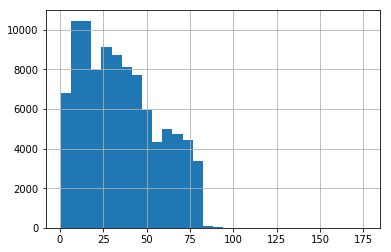

In [51]:
data_group.months_since_last_delinquent.hist(bins = 30)

In [52]:
data_group.months_since_last_delinquent.fillna(0, inplace = True)

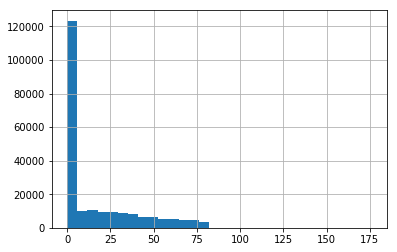

In [53]:
data_group.months_since_last_delinquent.hist(bins = 30)

In [54]:
data_group.isnull().sum()[data_group.isnull().sum()>0]

credit_score            44498
years_in_current_job     8990
annual_income           44498
bankruptcies              452
tax_liens                  22
dtype: int64

## 9.2. Missing values for Tax Liens

In [55]:
data_group.tax_liens.unique()

array([ 0.,  5., nan,  1.,  2.,  4.,  3.,  6.,  7.,  9.,  8., 10., 11.])

In [56]:
print(data_group.tax_liens[data_group.tax_liens == 0].count())
print(data_group.tax_liens[data_group.tax_liens == 1].count())
print(data_group.tax_liens[data_group.tax_liens == 2].count())
print(data_group.tax_liens[data_group.tax_liens == 3].count())
print(data_group.tax_liens[data_group.tax_liens == 4].count())
print(data_group.tax_liens[data_group.tax_liens == 5].count())
print(data_group.tax_liens[data_group.tax_liens == 6].count())
print(data_group.tax_liens[data_group.tax_liens == 7].count())
print(data_group.tax_liens[data_group.tax_liens == 8].count())
print(data_group.tax_liens[data_group.tax_liens == 9].count())
print(data_group.tax_liens[data_group.tax_liens == 10].count())
print(data_group.tax_liens[data_group.tax_liens == 11].count())

211881
2701
707
195
97
48
26
6
7
5
3
2


In [57]:
data_group[data_group.tax_liens.isnull()].head()

,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
loan_id,,,,,,,,,,,,,,,,,,
002dc37f-f6b5-4113-8d5c-53c25ac6111e,647fd091-0705-4a01-9da6-e57c427562f0,1,5006,Short Term,749.0,0.5,Own Home,45054.0,Debt Consolidation,42.05,25.0,0.5,5,0,1785,0,NaN,NaN
0302ccc1-e514-459e-88b0-88db890299d9,0fb77c3a-0dea-4814-86de-5684989d8c03,1,7633,Short Term,746.0,1.0,Home Mortgage,152655.0,Home Improvements,346.02,23.2,0.5,15,0,24097,98759,NaN,NaN
193d7f29-89f9-4c59-9e44-c1ca8ea36209,3b462912-a081-4407-a1b1-3553a29bb974,1,5017,Short Term,NaN,10.0,Home Mortgage,NaN,Other,15.22,21.6,0.0,12,0,1581,27740,NaN,NaN
1c622daa-f250-4c9d-9886-70584f2f386c,df6364b3-d29e-4eb7-9999-2bab32665de1,1,5695,Short Term,NaN,10.0,Home Mortgage,NaN,Debt Consolidation,27.86,29.5,0.5,10,0,2790,27356,NaN,NaN
2cb16c8a-eb82-455e-981b-6a1ccaa23ad4,c40c5e81-65a7-4be3-8a52-cb3cc4b2aafa,1,4896,Short Term,NaN,8.0,Home Mortgage,NaN,Debt Consolidation,224.21,18.8,0.5,8,0,8204,48544,NaN,NaN


In [58]:
data_group.corr()

,loan_status,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
loan_status,1.000000,0.209140,0.245848,0.003811,0.064451,-0.014158,0.030149,-0.000326,-0.017602,-0.009090,0.007107,0.006028,0.000139,-0.010736
current_loan_amount,0.209140,1.000000,0.062514,0.005680,0.019233,-0.000154,0.012003,-0.003496,-0.000897,0.001095,0.002305,0.005702,0.003645,-0.001876
credit_score,0.245848,0.062514,1.000000,-0.017600,0.014844,-0.088168,0.085461,-0.057955,-0.038642,-0.062030,-0.014965,0.010204,-0.048202,-0.027476
years_in_current_job,0.003811,0.005680,-0.017600,1.000000,0.072036,0.124550,0.228909,0.042339,0.047429,0.043618,0.093956,0.003693,0.046231,0.007752
annual_income,0.064451,0.019233,0.014844,0.072036,1.000000,0.471005,0.155115,0.018212,0.145422,-0.017196,0.305022,0.031687,-0.047313,0.036216
monthly_debt,-0.014158,-0.000154,-0.088168,0.124550,0.471005,1.000000,0.192300,0.012651,0.412035,-0.056563,0.473981,0.025367,-0.080392,0.016771
years_of_credit_history,0.030149,0.012003,0.085461,0.228909,0.155115,0.192300,1.000000,0.087071,0.130020,0.060393,0.202269,0.021233,0.061128,0.021056
months_since_last_delinquent,-0.000326,-0.003496,-0.057955,0.042339,0.018212,0.012651,0.087071,1.000000,0.033881,0.072202,-0.065119,-0.003936,0.048310,0.030300
number_of_open_accounts,-0.017602,-0.000897,-0.038642,0.047429,0.145422,0.412035,0.130020,0.033881,1.000000,-0.015721,0.221711,0.018255,-0.024167,0.004558
number_of_credit_problems,-0.009090,0.001095,-0.062030,0.043618,-0.017196,-0.056563,0.060393,0.072202,-0.015721,1.000000,-0.106362,-0.008148,0.763386,0.579014


In [59]:
data_group[(data_group.purpose == 'Debt Consolidation') | (data_group.purpose == 'Other')].head()

,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
loan_id,,,,,,,,,,,,,,,,,,
000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,Other,1106.04,26.3,0.0,17,0,6262,19149,0.0,0.0
00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,0.0,5,0,20967,28335,0.0,0.0
00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,Short Term,747.0,10.0,Own Home,38072.0,Debt Consolidation,751.92,26.2,0.0,9,0,22529,43915,0.0,0.0
0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,0.0,12,0,17391,37081,0.0,0.0


In [60]:
data_group.tax_liens[data_group.number_of_credit_problems >=3].mean()

2.0208728652751424

In [61]:
data_group[data_group.number_of_credit_problems >=3].head()

,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
loan_id,,,,,,,,,,,,,,,,,,
0029dcf5-dea2-4a90-a087-5c3689f01aa2,b2547047-f15c-4771-9c85-3a0959e96256,1,99999999,Short Term,726.0,1.0,Home Mortgage,61098.0,Other,1125.22,15.3,0.0,8,5,7086,7436,0.0,5.0
00796110-bf8b-4f9f-b623-cb3cc1c24850,c123ecab-0cf4-4b2f-aac7-3573859cc1e4,1,25240,Short Term,714.0,0.5,Home Mortgage,126200.0,Debt Consolidation,846.59,20.0,0.0,11,3,13225,33145,0.0,2.0
008ea0f8-f38d-4dcf-b2f8-6997fab633d0,38a79cca-0baa-4105-b419-81cfb9450ae6,1,99999999,Short Term,722.0,4.0,Rent,41977.0,Debt Consolidation,755.58,16.3,0.0,8,3,11178,13566,1.0,2.0
00c97e26-8e63-4474-a341-2975ebd4ceba,ee518dea-e35c-4ffc-ba4c-a793e25b57dc,1,99999999,Short Term,745.0,9.0,Home Mortgage,280830.0,Home Improvements,762.92,21.7,0.0,4,4,17641,36374,0.0,4.0
00e99a77-ebe1-41e3-8ea4-a2864f09ffe4,0aafb07b-c95c-404b-a3ca-72a46faec0d3,1,14534,Short Term,NaN,0.5,Rent,NaN,Debt Consolidation,524.16,18.6,36.0,14,3,10116,10694,3.0,0.0


In [62]:
data_group[data_group.current_loan_amount == 99999999].head()

,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
loan_id,,,,,,,,,,,,,,,,,,
00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6,c9decd06-16f7-44c3-b007-8776f2a9233d,1,99999999,Short Term,742.0,3.0,Home Mortgage,64760.0,Debt Consolidation,582.84,26.8,0.0,11,0,8880,22711,0.0,0.0
0002c691-5314-44ab-b205-3fb1cc4ee6b2,41207d1e-5d13-43ec-9fe9-f222b4da5e0c,1,99999999,Short Term,744.0,6.0,Home Mortgage,65605.0,Debt Consolidation,984.07,21.0,0.0,5,1,11514,17262,1.0,0.0
0003fbfd-33ee-4ae9-8074-b46f6ff59281,c14bbc84-5041-4e70-bd64-3db51f7e80ae,1,99999999,Short Term,745.0,10.0,Rent,39476.0,Other,483.58,15.4,79.0,12,0,4636,21171,0.0,0.0
0004f37b-5859-40f6-98d0-367aa3b3f3f1,f662b062-5fa5-463d-b5c0-4e36d09fcab1,1,99999999,Short Term,724.0,1.0,Own Home,34297.0,Home Improvements,777.38,13.6,2.0,12,0,6720,53335,0.0,0.0
0008cacc-1ea9-4599-b114-12709b13c85d,cd853967-4535-4d36-bf93-269504c74911,1,99999999,Short Term,750.0,10.0,Own Home,86785.0,Other,56.41,22.0,0.0,7,0,3959,63862,0.0,0.0


In [63]:
data_group[(data_group.current_loan_amount == 99999999)& (data_group.tax_liens == 0)].head()

,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
loan_id,,,,,,,,,,,,,,,,,,
00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6,c9decd06-16f7-44c3-b007-8776f2a9233d,1,99999999,Short Term,742.0,3.0,Home Mortgage,64760.0,Debt Consolidation,582.84,26.8,0.0,11,0,8880,22711,0.0,0.0
0002c691-5314-44ab-b205-3fb1cc4ee6b2,41207d1e-5d13-43ec-9fe9-f222b4da5e0c,1,99999999,Short Term,744.0,6.0,Home Mortgage,65605.0,Debt Consolidation,984.07,21.0,0.0,5,1,11514,17262,1.0,0.0
0003fbfd-33ee-4ae9-8074-b46f6ff59281,c14bbc84-5041-4e70-bd64-3db51f7e80ae,1,99999999,Short Term,745.0,10.0,Rent,39476.0,Other,483.58,15.4,79.0,12,0,4636,21171,0.0,0.0
0004f37b-5859-40f6-98d0-367aa3b3f3f1,f662b062-5fa5-463d-b5c0-4e36d09fcab1,1,99999999,Short Term,724.0,1.0,Own Home,34297.0,Home Improvements,777.38,13.6,2.0,12,0,6720,53335,0.0,0.0
0008cacc-1ea9-4599-b114-12709b13c85d,cd853967-4535-4d36-bf93-269504c74911,1,99999999,Short Term,750.0,10.0,Own Home,86785.0,Other,56.41,22.0,0.0,7,0,3959,63862,0.0,0.0


In [64]:
data_group[(data_group.current_loan_amount == 99999999)& (data_group.tax_liens >= 1)].head()

,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
loan_id,,,,,,,,,,,,,,,,,,
0029dcf5-dea2-4a90-a087-5c3689f01aa2,b2547047-f15c-4771-9c85-3a0959e96256,1,99999999,Short Term,726.0,1.0,Home Mortgage,61098.0,Other,1125.22,15.3,0.0,8,5,7086,7436,0.0,5.0
008ea0f8-f38d-4dcf-b2f8-6997fab633d0,38a79cca-0baa-4105-b419-81cfb9450ae6,1,99999999,Short Term,722.0,4.0,Rent,41977.0,Debt Consolidation,755.58,16.3,0.0,8,3,11178,13566,1.0,2.0
00bbc4c1-d174-4a9b-88a0-54a170fa6b42,1d9c38aa-4ff9-4a65-a345-1bc2707556b4,1,99999999,Long Term,682.0,4.0,Home Mortgage,103754.0,Debt Consolidation,1979.98,16.2,38.0,22,1,7808,12821,0.0,1.0
00c97e26-8e63-4474-a341-2975ebd4ceba,ee518dea-e35c-4ffc-ba4c-a793e25b57dc,1,99999999,Short Term,745.0,9.0,Home Mortgage,280830.0,Home Improvements,762.92,21.7,0.0,4,4,17641,36374,0.0,4.0
00d95bd7-aadf-4dc0-98ff-24b30b72a967,099aad8b-e998-46f3-aaff-4bd5504e6e73,1,99999999,Short Term,708.0,5.0,Home Mortgage,160992.0,Home Improvements,77.81,15.7,0.0,9,1,7687,10062,0.0,1.0


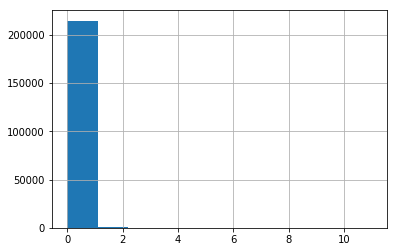

In [65]:
data_group.tax_liens.hist()

# Missing values of tax_liens will be filled in with 0 because that's the most occurring value as it shows in the above histogram.

In [66]:
data_group.tax_liens.fillna(0, inplace = True)

## 9.2 Creating an Organization column from tax_liens. Most individuals are not able to get away from the government and law if they don’t pay taxes, but governments sometimes make exceptions for companies and big corporations. Hence people who have 1 or more than 1 tax_liens are likely to be an organization instead of a single individual, so all values from 1 and 11 to will be replaced with 1. Now there will only be different numbers in tax_liens, 0 (individuals) and 1 (companies).

In [67]:
data_group['organization'] = data_group['tax_liens']

In [69]:
data_group.head()

,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens,organization
loan_id,,,,,,,,,,,,,,,,,,,
000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056,0.0,0.0,0.0
00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,Other,1106.04,26.3,0.0,17,0,6262,19149,0.0,0.0,0.0
00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,0.0,5,0,20967,28335,0.0,0.0,0.0
00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,Short Term,747.0,10.0,Own Home,38072.0,Debt Consolidation,751.92,26.2,0.0,9,0,22529,43915,0.0,0.0,0.0
0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,0.0,12,0,17391,37081,0.0,0.0,0.0


In [70]:
data_group['organization'].replace(2,1,inplace = True)
data_group['organization'].replace(3,1,inplace = True)
data_group['organization'].replace(4,1,inplace = True)
data_group['organization'].replace(5,1,inplace = True)
data_group['organization'].replace(6,1,inplace = True)
data_group['organization'].replace(7,1,inplace = True)
data_group['organization'].replace(8,1,inplace = True)
data_group['organization'].replace(9,1,inplace = True)
data_group['organization'].replace(10,1,inplace = True)
data_group['organization'].replace(11,1,inplace = True)

In [71]:
data_group.isnull().sum()[data_group.isnull().sum()>0]

credit_score            44498
years_in_current_job     8990
annual_income           44498
bankruptcies              452
dtype: int64

## 9.3 Missing values for bankruptcies

In [72]:
print(data_group.number_of_credit_problems[(data_group.number_of_credit_problems == 0) & (data_group.bankruptcies.isnull())].count())
print(data_group.number_of_credit_problems[(data_group.number_of_credit_problems == 1) & (data_group.bankruptcies.isnull())].count())
print(data_group.number_of_credit_problems[(data_group.number_of_credit_problems == 2) & (data_group.bankruptcies.isnull())].count())
print(data_group.number_of_credit_problems[(data_group.number_of_credit_problems == 3) & (data_group.bankruptcies.isnull())].count())
print(data_group.number_of_credit_problems[(data_group.number_of_credit_problems == 4) & (data_group.bankruptcies.isnull())].count())
print(data_group.number_of_credit_problems[(data_group.number_of_credit_problems == 5) & (data_group.bankruptcies.isnull())].count())
print(data_group.number_of_credit_problems[(data_group.number_of_credit_problems == 6) & (data_group.bankruptcies.isnull())].count())
print(data_group.number_of_credit_problems[(data_group.number_of_credit_problems == 7) & (data_group.bankruptcies.isnull())].count())
print(data_group.number_of_credit_problems[(data_group.number_of_credit_problems == 8) & (data_group.bankruptcies.isnull())].count())
print(data_group.number_of_credit_problems[(data_group.number_of_credit_problems == 9) & (data_group.bankruptcies.isnull())].count())
print(data_group.number_of_credit_problems[(data_group.number_of_credit_problems == 10) & (data_group.bankruptcies.isnull())].count())
print(data_group.number_of_credit_problems[(data_group.number_of_credit_problems == 11) & (data_group.bankruptcies.isnull())].count())

439
13
0
0
0
0
0
0
0
0
0
0


# There are 13 people who have 1 credit problem. 439 people have 0 credit problems. Most of the people who are missing values in bankruptcies have 0 credit problems. Based off of the above information that more people (88.3% people) have 0 bankruptcies, the missing values for bankruptcies will be filled in with 0.

In [73]:
data_group.bankruptcies.fillna(0, inplace = True)

In [74]:
data_group.isnull().sum()[data_group.isnull().sum()>0]

credit_score            44498
years_in_current_job     8990
annual_income           44498
dtype: int64

## 9.4. Missing values: years in current job


In [75]:
data_group.corr()

,loan_status,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens,organization
loan_status,1.000000,0.209140,0.245848,0.003811,0.064451,-0.014158,0.030149,-0.000326,-0.017602,-0.009090,0.007107,0.006028,0.000100,-0.010739,-0.010984
current_loan_amount,0.209140,1.000000,0.062514,0.005680,0.019233,-0.000154,0.012003,-0.003496,-0.000897,0.001095,0.002305,0.005702,0.003652,-0.001874,-0.002746
credit_score,0.245848,0.062514,1.000000,-0.017600,0.014844,-0.088168,0.085461,-0.057955,-0.038642,-0.062030,-0.014965,0.010204,-0.048236,-0.027479,-0.035294
years_in_current_job,0.003811,0.005680,-0.017600,1.000000,0.072036,0.124550,0.228909,0.042339,0.047429,0.043618,0.093956,0.003693,0.046554,0.007758,0.009177
annual_income,0.064451,0.019233,0.014844,0.072036,1.000000,0.471005,0.155115,0.018212,0.145422,-0.017196,0.305022,0.031687,-0.047194,0.036210,0.036369
monthly_debt,-0.014158,-0.000154,-0.088168,0.124550,0.471005,1.000000,0.192300,0.012651,0.412035,-0.056563,0.473981,0.025367,-0.079882,0.016778,0.018651
years_of_credit_history,0.030149,0.012003,0.085461,0.228909,0.155115,0.192300,1.000000,0.087071,0.130020,0.060393,0.202269,0.021233,0.060806,0.021051,0.020620
months_since_last_delinquent,-0.000326,-0.003496,-0.057955,0.042339,0.018212,0.012651,0.087071,1.000000,0.033881,0.072202,-0.065119,-0.003936,0.048353,0.030304,0.035502
number_of_open_accounts,-0.017602,-0.000897,-0.038642,0.047429,0.145422,0.412035,0.130020,0.033881,1.000000,-0.015721,0.221711,0.018255,-0.023934,0.004559,0.008512
number_of_credit_problems,-0.009090,0.001095,-0.062030,0.043618,-0.017196,-0.056563,0.060393,0.072202,-0.015721,1.000000,-0.106362,-0.008148,0.763322,0.579008,0.492578


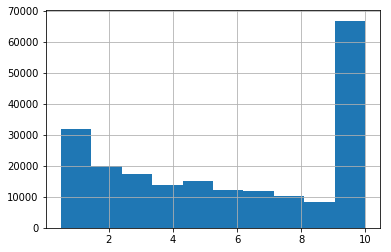

In [76]:
data_group.years_in_current_job.hist()

# Years in current job is correlated with years of credit history at 22%, so years of credit history is analyzed to fill the missing values for years in current job.

In [77]:
data_group[(data_group.years_of_credit_history >= 10)].head()

,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens,organization
loan_id,,,,,,,,,,,,,,,,,,,
000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056,0.0,0.0,0.0
00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,Other,1106.04,26.3,0.0,17,0,6262,19149,0.0,0.0,0.0
00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,0.0,5,0,20967,28335,0.0,0.0,0.0
00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,Short Term,747.0,10.0,Own Home,38072.0,Debt Consolidation,751.92,26.2,0.0,9,0,22529,43915,0.0,0.0,0.0
0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,0.0,12,0,17391,37081,0.0,0.0,0.0


In [78]:
print(data_group.years_of_credit_history[(data_group.years_of_credit_history >= 0) & 
                                         (data_group.years_of_credit_history <= 10) &
                                         (data_group.years_in_current_job.isnull())].count())

print(data_group.years_of_credit_history[(data_group.years_of_credit_history >= 11) & 
                                         (data_group.years_of_credit_history <= 20) &
                                         (data_group.years_in_current_job.isnull())].count())

print(data_group.years_of_credit_history[(data_group.years_of_credit_history >= 21) & 
                                         (data_group.years_of_credit_history <= 30) &
                                         (data_group.years_in_current_job.isnull())].count())

print(data_group.years_of_credit_history[(data_group.years_of_credit_history >= 31) & 
                                         (data_group.years_of_credit_history <= 40) &
                                         (data_group.years_in_current_job.isnull())].count())

print(data_group.years_of_credit_history[(data_group.years_of_credit_history >= 41) & 
                                         (data_group.years_of_credit_history <= 50) &
                                         (data_group.years_in_current_job.isnull())].count())

print(data_group.years_of_credit_history[(data_group.years_of_credit_history >= 51) & 
                                         (data_group.years_of_credit_history <= 60) &
                                         (data_group.years_in_current_job.isnull())].count())

print(data_group.years_of_credit_history[(data_group.years_of_credit_history >= 61) & 
                                         (data_group.years_of_credit_history <= 71) &
                                         (data_group.years_in_current_job.isnull())].count())


400
3705
2389
1173
508
63
5


In [79]:
data_group.years_of_credit_history.max()

70.5

In [80]:
print(data_group.years_in_current_job[(data_group.years_of_credit_history >= 0) & 
                                         (data_group.years_of_credit_history <= 10)].agg(('mean','count','median')))

print(data_group.years_in_current_job[(data_group.years_of_credit_history >= 11) & 
                                         (data_group.years_of_credit_history <= 20)].agg(('mean','count','median')))

print(data_group.years_in_current_job[(data_group.years_of_credit_history >= 21) & 
                                         (data_group.years_of_credit_history <= 30)].agg(('mean','count','median')))

print(data_group.years_in_current_job[(data_group.years_of_credit_history >= 31) & 
                                         (data_group.years_of_credit_history <= 40)].agg(('mean','count','median')))

print(data_group.years_in_current_job[(data_group.years_of_credit_history >= 41) & 
                                         (data_group.years_of_credit_history <= 50)].agg(('mean','count','median')))

print(data_group.years_in_current_job[(data_group.years_of_credit_history >= 51) & 
                                         (data_group.years_of_credit_history <= 60)].agg(('mean','count','median')))

print(data_group.years_in_current_job[(data_group.years_of_credit_history >= 61) & 
                                         (data_group.years_of_credit_history <= 71)].agg(('mean','count','median')))

mean          3.774462
count     17578.000000
median        3.000000
Name: years_in_current_job, dtype: float64
mean           5.801518
count     116172.000000
median         6.000000
Name: years_in_current_job, dtype: float64
mean          6.833652
count     44948.000000
median        8.000000
Name: years_in_current_job, dtype: float64
mean         7.049812
count     9325.000000
median       9.000000
Name: years_in_current_job, dtype: float64
mean         6.768702
count     1310.000000
median       8.000000
Name: years_in_current_job, dtype: float64
mean       7.05
count     90.00
median    10.00
Name: years_in_current_job, dtype: float64
mean      7.428571
count     7.000000
median    9.000000
Name: years_in_current_job, dtype: float64


442


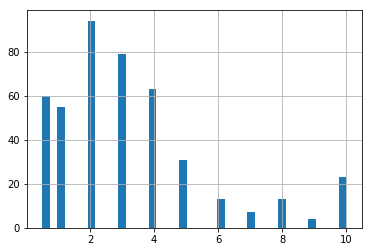

In [81]:
print(data_group.years_in_current_job[(data_group.years_of_credit_history >= 4) & 
                                         (data_group.years_of_credit_history <= 5)].count())
data_group.years_in_current_job[(data_group.years_of_credit_history >= 4) & 
                                         (data_group.years_of_credit_history <= 5)].hist(bins=40)

1212


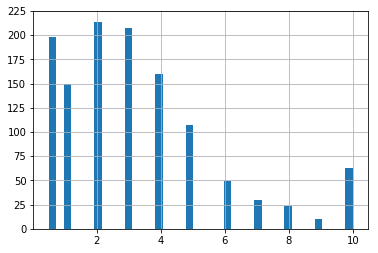

In [82]:
print(data_group.years_in_current_job[(data_group.years_of_credit_history >= 5) & 
                                         (data_group.years_of_credit_history <= 6)].count())
data_group.years_in_current_job[(data_group.years_of_credit_history >= 5) & 
                                         (data_group.years_of_credit_history <= 6)].hist(bins=40)

1793


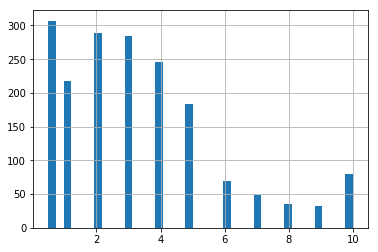

In [83]:
print(data_group.years_in_current_job[(data_group.years_of_credit_history >= 6) & 
                                         (data_group.years_of_credit_history <= 7)].count())
data_group.years_in_current_job[(data_group.years_of_credit_history >= 6) & 
                                         (data_group.years_of_credit_history <= 7)].hist(bins=40)

2754


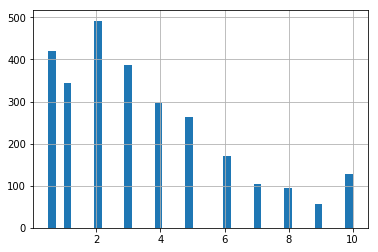

In [84]:
print(data_group.years_in_current_job[(data_group.years_of_credit_history >= 7) & 
                                         (data_group.years_of_credit_history <= 8)].count())
data_group.years_in_current_job[(data_group.years_of_credit_history >= 7) & 
                                         (data_group.years_of_credit_history <= 8)].hist(bins=40)

5485


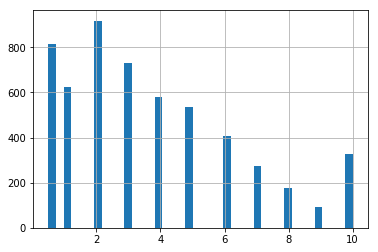

In [85]:
print(data_group.years_in_current_job[(data_group.years_of_credit_history >= 8) & 
                                         (data_group.years_of_credit_history <= 9)].count())
data_group.years_in_current_job[(data_group.years_of_credit_history >= 8) & 
                                         (data_group.years_of_credit_history <= 9)].hist(bins=40)

8317


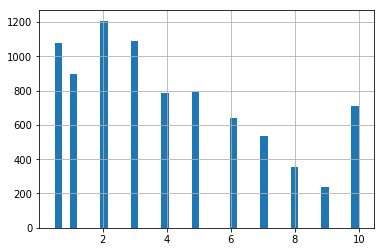

In [86]:
print(data_group.years_in_current_job[(data_group.years_of_credit_history >= 9) & 
                                         (data_group.years_of_credit_history <= 10)].count())
data_group.years_in_current_job[(data_group.years_of_credit_history >= 9) & 
                                         (data_group.years_of_credit_history <= 10)].hist(bins=40)

mean          3.774462
count     17578.000000
median        3.000000
Name: years_in_current_job, dtype: float64


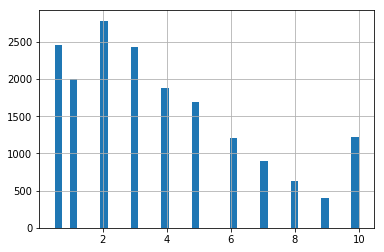

In [87]:
print(data_group.years_in_current_job[(data_group.years_of_credit_history >= 0) & 
                                         (data_group.years_of_credit_history <= 10)].agg(('mean','count','median')))
data_group.years_in_current_job[(data_group.years_of_credit_history >= 0) & 
                                         (data_group.years_of_credit_history <= 10)].hist(bins=40)

In [88]:
data_train.isnull().sum()[data_train.isnull().sum()>0]

credit_score                     61676
years_in_current_job             11476
annual_income                    61676
months_since_last_delinquent    140383
bankruptcies                       529
tax_liens                           23
dtype: int64

In [89]:
data_train.head()

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,Other,1106.04,26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,Short Term,747.0,10.0,Own Home,38072.0,Debt Consolidation,751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


116172


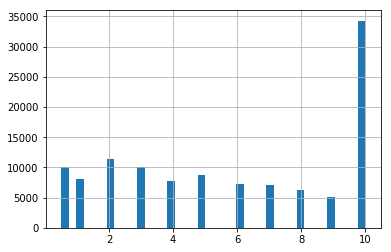

In [90]:
print(data_group.years_in_current_job[(data_group.years_of_credit_history >= 11) & 
                                         (data_group.years_of_credit_history <= 20)].count())
data_group.years_in_current_job[(data_group.years_of_credit_history >= 11) & 
                                         (data_group.years_of_credit_history <= 20)].hist(bins = 40)

44948


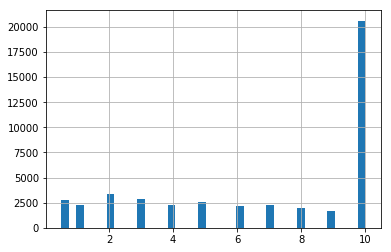

In [91]:
print(data_group.years_in_current_job[(data_group.years_of_credit_history >= 21) & 
                                         (data_group.years_of_credit_history <= 30)].count())
data_group.years_in_current_job[(data_group.years_of_credit_history >= 21) & 
                                         (data_group.years_of_credit_history <= 30)].hist(bins = 40)

9325


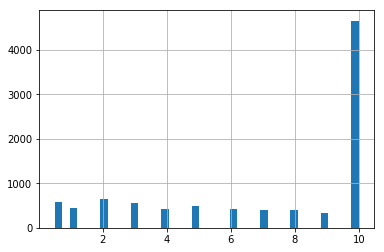

In [92]:
print(data_group.years_in_current_job[(data_group.years_of_credit_history >= 31) & 
                                         (data_group.years_of_credit_history <= 40)].count())
data_group.years_in_current_job[(data_group.years_of_credit_history >= 31) & 
                                         (data_group.years_of_credit_history <= 40)].hist(bins = 40)

1310


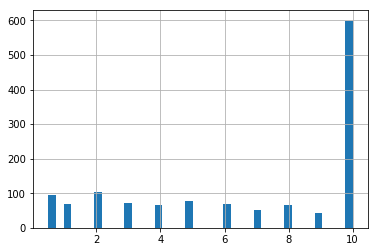

In [93]:
print(data_group.years_in_current_job[(data_group.years_of_credit_history >= 41) & 
                                         (data_group.years_of_credit_history <= 50)].count())
data_group.years_in_current_job[(data_group.years_of_credit_history >= 41) & 
                                         (data_group.years_of_credit_history <= 50)].hist(bins = 40)

90


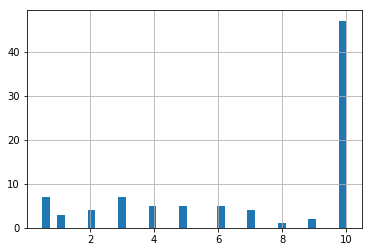

In [94]:
print(data_group.years_in_current_job[(data_group.years_of_credit_history >= 51) & 
                                         (data_group.years_of_credit_history <= 60)].count())
data_group.years_in_current_job[(data_group.years_of_credit_history >= 51) & 
                                         (data_group.years_of_credit_history <= 60)].hist(bins = 40)

6


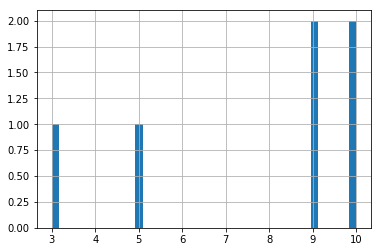

In [95]:
print(data_group.years_in_current_job[(data_group.years_of_credit_history >= 61) & 
                                         (data_group.years_of_credit_history <= 70)].count())
data_group.years_in_current_job[(data_group.years_of_credit_history >= 61) & 
                                         (data_group.years_of_credit_history <= 70)].hist(bins = 40)

## For people who have a 0 to 10 "years of credit history", median of 3 will be used to fill missing values for "years in current job". 

## And people who have 10+ "years of credit history", their missing values for "years in current job" will be filled with 10.

In [96]:
data_group.head()

,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens,organization
loan_id,,,,,,,,,,,,,,,,,,,
000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056,0.0,0.0,0.0
00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,Other,1106.04,26.3,0.0,17,0,6262,19149,0.0,0.0,0.0
00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,0.0,5,0,20967,28335,0.0,0.0,0.0
00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,Short Term,747.0,10.0,Own Home,38072.0,Debt Consolidation,751.92,26.2,0.0,9,0,22529,43915,0.0,0.0,0.0
0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,0.0,12,0,17391,37081,0.0,0.0,0.0


In [97]:
dg_yj = data_group[data_group.years_in_current_job.isnull()]
dg_yj.head()

,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens,organization
loan_id,,,,,,,,,,,,,,,,,,,
0001cb86-af28-4011-bb86-183786e473ae,4aae67bb-d54b-41ae-8bce-1d62022ed8dd,1,2036,Short Term,733.0,NaN,Home Mortgage,55985.0,Debt Consolidation,741.79,19.8,29.0,7,0,10926,15676,0.0,0.0,0.0
0008255a-402e-4716-9e0a-8bdf55309781,4e25b6bf-9abc-4bbd-841e-c5a8403b68de,1,6114,Short Term,NaN,NaN,Home Mortgage,NaN,Debt Consolidation,206.97,17.8,21.0,8,1,5772,13975,1.0,0.0,0.0
000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,1,7068,Short Term,NaN,NaN,Own Home,NaN,Other,425.68,21.3,0.0,7,1,4178,6850,1.0,0.0,0.0
001775be-defd-4c40-bda8-54edb5279848,75cd8e2e-2f86-459a-a719-e9f8384df817,1,99999999,Short Term,675.0,NaN,Own Home,36549.0,Debt Consolidation,444.68,14.2,0.0,7,0,18193,21329,0.0,0.0,0.0
0017ddc4-0232-441e-a01d-6b5bb67d0cc8,7668401c-2bf7-4edd-8233-c910d87fc0ca,1,1971,Short Term,746.0,NaN,Home Mortgage,39420.0,Home Improvements,768.69,22.0,43.0,7,0,8256,17163,0.0,0.0,0.0


In [98]:
data_group.dropna(subset=['years_in_current_job'], inplace = True)

In [99]:
data_group.head()

,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens,organization
loan_id,,,,,,,,,,,,,,,,,,,
000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056,0.0,0.0,0.0
00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,Other,1106.04,26.3,0.0,17,0,6262,19149,0.0,0.0,0.0
00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,0.0,5,0,20967,28335,0.0,0.0,0.0
00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,Short Term,747.0,10.0,Own Home,38072.0,Debt Consolidation,751.92,26.2,0.0,9,0,22529,43915,0.0,0.0,0.0
0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,0.0,12,0,17391,37081,0.0,0.0,0.0


In [100]:
dg_yj.years_in_current_job.fillna(10, inplace = True)

C:\Users\Aniq\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [101]:
dg_yj.head()

,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens,organization
loan_id,,,,,,,,,,,,,,,,,,,
0001cb86-af28-4011-bb86-183786e473ae,4aae67bb-d54b-41ae-8bce-1d62022ed8dd,1,2036,Short Term,733.0,10.0,Home Mortgage,55985.0,Debt Consolidation,741.79,19.8,29.0,7,0,10926,15676,0.0,0.0,0.0
0008255a-402e-4716-9e0a-8bdf55309781,4e25b6bf-9abc-4bbd-841e-c5a8403b68de,1,6114,Short Term,NaN,10.0,Home Mortgage,NaN,Debt Consolidation,206.97,17.8,21.0,8,1,5772,13975,1.0,0.0,0.0
000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,1,7068,Short Term,NaN,10.0,Own Home,NaN,Other,425.68,21.3,0.0,7,1,4178,6850,1.0,0.0,0.0
001775be-defd-4c40-bda8-54edb5279848,75cd8e2e-2f86-459a-a719-e9f8384df817,1,99999999,Short Term,675.0,10.0,Own Home,36549.0,Debt Consolidation,444.68,14.2,0.0,7,0,18193,21329,0.0,0.0,0.0
0017ddc4-0232-441e-a01d-6b5bb67d0cc8,7668401c-2bf7-4edd-8233-c910d87fc0ca,1,1971,Short Term,746.0,10.0,Home Mortgage,39420.0,Home Improvements,768.69,22.0,43.0,7,0,8256,17163,0.0,0.0,0.0


In [102]:
replacing_values = dg_yj.years_in_current_job[(dg_yj.years_of_credit_history >= 0) & 
                                         (dg_yj.years_of_credit_history <= 10)]

replacing_values.head()

loan_id
013e2cf0-75df-4420-8d31-62398fa8b86b    10.0
02727ffd-e145-4824-ad2d-760df12edd35    10.0
036ad2b3-3203-4ab9-99dd-145ffec71aa0    10.0
04d307c3-a923-4bb7-aca3-ec76b2cf9f8f    10.0
04d3b721-358d-4922-944c-bba48b8124bd    10.0
Name: years_in_current_job, dtype: float64

In [103]:
dg_yj['years_in_current_job'].replace(replacing_values,3,inplace = True)
dg_yj.head()

C:\Users\Aniq\Anaconda3\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens,organization
loan_id,,,,,,,,,,,,,,,,,,,
0001cb86-af28-4011-bb86-183786e473ae,4aae67bb-d54b-41ae-8bce-1d62022ed8dd,1,2036,Short Term,733.0,10.0,Home Mortgage,55985.0,Debt Consolidation,741.79,19.8,29.0,7,0,10926,15676,0.0,0.0,0.0
0008255a-402e-4716-9e0a-8bdf55309781,4e25b6bf-9abc-4bbd-841e-c5a8403b68de,1,6114,Short Term,NaN,10.0,Home Mortgage,NaN,Debt Consolidation,206.97,17.8,21.0,8,1,5772,13975,1.0,0.0,0.0
000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,1,7068,Short Term,NaN,10.0,Own Home,NaN,Other,425.68,21.3,0.0,7,1,4178,6850,1.0,0.0,0.0
001775be-defd-4c40-bda8-54edb5279848,75cd8e2e-2f86-459a-a719-e9f8384df817,1,99999999,Short Term,675.0,10.0,Own Home,36549.0,Debt Consolidation,444.68,14.2,0.0,7,0,18193,21329,0.0,0.0,0.0
0017ddc4-0232-441e-a01d-6b5bb67d0cc8,7668401c-2bf7-4edd-8233-c910d87fc0ca,1,1971,Short Term,746.0,10.0,Home Mortgage,39420.0,Home Improvements,768.69,22.0,43.0,7,0,8256,17163,0.0,0.0,0.0


In [104]:
data_group = data_group.append(dg_yj, ignore_index = True)
data_group.head()

,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens,organization
0,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056,0.0,0.0,0.0
1,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,Other,1106.04,26.3,0.0,17,0,6262,19149,0.0,0.0,0.0
2,defce609-c631-447d-aad6-1270615e89c4,1,21029,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,0.0,5,0,20967,28335,0.0,0.0,0.0
3,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,Short Term,747.0,10.0,Own Home,38072.0,Debt Consolidation,751.92,26.2,0.0,9,0,22529,43915,0.0,0.0,0.0
4,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,0.0,12,0,17391,37081,0.0,0.0,0.0


## Above method to fill missing values for "years in current job" is not efficient because a new DataFrame was created to ensure no other values were filled or replaced accidentally when different parameters and slices were entered. 
## A simpler method would be to make the slice with conditions equal to 3 and then the rest of the values can be filled in with 10. This way there will be no way to create DataFrames and to append them together at the end. 




In [105]:
data_group.isnull().sum()[data_group.isnull().sum()>0]

credit_score     44498
annual_income    44498
dtype: int64

## 10. Fill missing values for credit_score and annual_income, but missing values for annual income will be filled first and then use annual income to fill the missing values for credit_score.

## 10.1. Values are sorted on annual_income and index is rest, so all the missing values of annual_income will appear at the bottom. annual_income has values filled at the top. A regression-based model will be trained by using the top half to predict the missing values that are at the bottom half.

In [106]:
data_group.sort_values('annual_income', inplace = True)

In [107]:
data_group.head()

,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens,organization
207816,77538d62-ee55-4f45-9949-1b91f3acf420,0,3622,Short Term,731.0,10.0,Home Mortgage,0.0,Debt Consolidation,0.00,38.0,10.0,8,0,10423,18318,0.0,0.0,0.0
204994,e3dedb71-dfc5-4872-a6b0-03aa22a74272,0,1384,Short Term,736.0,0.5,Rent,4033.0,Debt Consolidation,44.50,9.5,0.0,8,0,1483,6709,0.0,0.0,0.0
208425,0c2fd18e-e83c-4885-97bb-d27a5d35d3bb,1,99999999,Short Term,733.0,3.0,Rent,4134.0,Educational Expenses,14.78,9.7,9.0,4,0,62,784,0.0,0.0,0.0
132404,f2374623-5f0b-4874-84fb-dc2f92923063,1,1762,Short Term,714.0,1.0,Rent,4699.0,Debt Consolidation,0.00,9.9,0.0,10,0,0,0,0.0,0.0,0.0
213868,fc807bb4-6471-4568-a4ad-69b72f62a5fe,1,980,Long Term,707.0,3.0,Rent,4704.0,Debt Consolidation,81.54,8.8,0.0,11,0,1651,2054,0.0,0.0,0.0


In [108]:
data_group.reset_index(drop=True, inplace = True)

In [109]:
data_group.head()

,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens,organization
0,77538d62-ee55-4f45-9949-1b91f3acf420,0,3622,Short Term,731.0,10.0,Home Mortgage,0.0,Debt Consolidation,0.00,38.0,10.0,8,0,10423,18318,0.0,0.0,0.0
1,e3dedb71-dfc5-4872-a6b0-03aa22a74272,0,1384,Short Term,736.0,0.5,Rent,4033.0,Debt Consolidation,44.50,9.5,0.0,8,0,1483,6709,0.0,0.0,0.0
2,0c2fd18e-e83c-4885-97bb-d27a5d35d3bb,1,99999999,Short Term,733.0,3.0,Rent,4134.0,Educational Expenses,14.78,9.7,9.0,4,0,62,784,0.0,0.0,0.0
3,f2374623-5f0b-4874-84fb-dc2f92923063,1,1762,Short Term,714.0,1.0,Rent,4699.0,Debt Consolidation,0.00,9.9,0.0,10,0,0,0,0.0,0.0,0.0
4,fc807bb4-6471-4568-a4ad-69b72f62a5fe,1,980,Long Term,707.0,3.0,Rent,4704.0,Debt Consolidation,81.54,8.8,0.0,11,0,1651,2054,0.0,0.0,0.0


In [110]:
data_group.head()

,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens,organization
0,77538d62-ee55-4f45-9949-1b91f3acf420,0,3622,Short Term,731.0,10.0,Home Mortgage,0.0,Debt Consolidation,0.00,38.0,10.0,8,0,10423,18318,0.0,0.0,0.0
1,e3dedb71-dfc5-4872-a6b0-03aa22a74272,0,1384,Short Term,736.0,0.5,Rent,4033.0,Debt Consolidation,44.50,9.5,0.0,8,0,1483,6709,0.0,0.0,0.0
2,0c2fd18e-e83c-4885-97bb-d27a5d35d3bb,1,99999999,Short Term,733.0,3.0,Rent,4134.0,Educational Expenses,14.78,9.7,9.0,4,0,62,784,0.0,0.0,0.0
3,f2374623-5f0b-4874-84fb-dc2f92923063,1,1762,Short Term,714.0,1.0,Rent,4699.0,Debt Consolidation,0.00,9.9,0.0,10,0,0,0,0.0,0.0,0.0
4,fc807bb4-6471-4568-a4ad-69b72f62a5fe,1,980,Long Term,707.0,3.0,Rent,4704.0,Debt Consolidation,81.54,8.8,0.0,11,0,1651,2054,0.0,0.0,0.0


In [111]:
data_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215700 entries, 0 to 215699
Data columns (total 19 columns):
customer_id                     215700 non-null object
loan_status                     215700 non-null int64
current_loan_amount             215700 non-null int64
term                            215700 non-null object
credit_score                    171202 non-null float64
years_in_current_job            215700 non-null float64
home_ownership                  215700 non-null object
annual_income                   171202 non-null float64
purpose                         215700 non-null object
monthly_debt                    215700 non-null float64
years_of_credit_history         215700 non-null float64
months_since_last_delinquent    215700 non-null float64
number_of_open_accounts         215700 non-null int64
number_of_credit_problems       215700 non-null int64
current_credit_balance          215700 non-null int64
maximum_open_credit             215700 non-null int64
bankruptc

In [112]:
data_group_customer_id = data_group['customer_id']

In [113]:
del data_group['customer_id']

## 10.1 Dummy values are created to turn the object featurse into integer so the algorithms can use these numerical numbers to train the model.

In [114]:
data_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215700 entries, 0 to 215699
Data columns (total 18 columns):
loan_status                     215700 non-null int64
current_loan_amount             215700 non-null int64
term                            215700 non-null object
credit_score                    171202 non-null float64
years_in_current_job            215700 non-null float64
home_ownership                  215700 non-null object
annual_income                   171202 non-null float64
purpose                         215700 non-null object
monthly_debt                    215700 non-null float64
years_of_credit_history         215700 non-null float64
months_since_last_delinquent    215700 non-null float64
number_of_open_accounts         215700 non-null int64
number_of_credit_problems       215700 non-null int64
current_credit_balance          215700 non-null int64
maximum_open_credit             215700 non-null int64
bankruptcies                    215700 non-null float64
tax_lien

In [115]:
after_dummies = pd.get_dummies(data_group, drop_first = True)
after_dummies.head()

,loan_status,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,...,home_ownership_Own Home,home_ownership_Rent,purpose_Buy House,purpose_Buy a Car,purpose_Debt Consolidation,purpose_Educational Expenses,purpose_Home Improvements,purpose_Medical Bills,purpose_Other,purpose_Take a Trip
0,0,3622,731.0,10.0,0.0,0.00,38.0,10.0,8,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1384,736.0,0.5,4033.0,44.50,9.5,0.0,8,0,...,0,1,0,0,1,0,0,0,0,0
2,1,99999999,733.0,3.0,4134.0,14.78,9.7,9.0,4,0,...,0,1,0,0,0,1,0,0,0,0
3,1,1762,714.0,1.0,4699.0,0.00,9.9,0.0,10,0,...,0,1,0,0,1,0,0,0,0,0
4,1,980,707.0,3.0,4704.0,81.54,8.8,0.0,11,0,...,0,1,0,0,1,0,0,0,0,0


In [116]:
after_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215700 entries, 0 to 215699
Data columns (total 26 columns):
loan_status                     215700 non-null int64
current_loan_amount             215700 non-null int64
credit_score                    171202 non-null float64
years_in_current_job            215700 non-null float64
annual_income                   171202 non-null float64
monthly_debt                    215700 non-null float64
years_of_credit_history         215700 non-null float64
months_since_last_delinquent    215700 non-null float64
number_of_open_accounts         215700 non-null int64
number_of_credit_problems       215700 non-null int64
current_credit_balance          215700 non-null int64
maximum_open_credit             215700 non-null int64
bankruptcies                    215700 non-null float64
tax_liens                       215700 non-null float64
organization                    215700 non-null float64
term_Short Term                 215700 non-null uint8
home_ow

## 10.2. Data is split because top half has all the filled values filled for annual_income, so the top half of the data is used to train the model to predict and fill the missing values of the bottom half of annual_income. 

In [117]:
edit_train = after_dummies[:171202]
edit_test = after_dummies[171202:]

In [118]:
edit_train.head()

,loan_status,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,...,home_ownership_Own Home,home_ownership_Rent,purpose_Buy House,purpose_Buy a Car,purpose_Debt Consolidation,purpose_Educational Expenses,purpose_Home Improvements,purpose_Medical Bills,purpose_Other,purpose_Take a Trip
0,0,3622,731.0,10.0,0.0,0.00,38.0,10.0,8,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1384,736.0,0.5,4033.0,44.50,9.5,0.0,8,0,...,0,1,0,0,1,0,0,0,0,0
2,1,99999999,733.0,3.0,4134.0,14.78,9.7,9.0,4,0,...,0,1,0,0,0,1,0,0,0,0
3,1,1762,714.0,1.0,4699.0,0.00,9.9,0.0,10,0,...,0,1,0,0,1,0,0,0,0,0
4,1,980,707.0,3.0,4704.0,81.54,8.8,0.0,11,0,...,0,1,0,0,1,0,0,0,0,0


In [119]:
edit_test.head()

,loan_status,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,...,home_ownership_Own Home,home_ownership_Rent,purpose_Buy House,purpose_Buy a Car,purpose_Debt Consolidation,purpose_Educational Expenses,purpose_Home Improvements,purpose_Medical Bills,purpose_Other,purpose_Take a Trip
171202,1,10036,NaN,5.0,NaN,386.36,17.7,0.0,7,0,...,0,1,0,0,1,0,0,0,0,0
171203,1,7228,NaN,3.0,NaN,439.56,17.8,0.0,13,1,...,0,0,0,0,1,0,0,0,0,0
171204,1,4612,NaN,10.0,NaN,262.27,14.0,0.0,4,0,...,0,1,0,0,1,0,0,0,0,0
171205,1,21075,NaN,10.0,NaN,2204.13,18.0,0.0,22,0,...,0,1,0,0,1,0,0,0,0,0
171206,1,2355,NaN,0.5,NaN,968.38,17.1,17.0,7,0,...,0,0,0,0,0,0,0,0,1,0


# 11. Creating the first model - "annual_income" is assigned to y because that is the target variable, values that will be predicted. X is assigned to all other features, except "credit_score", because credit_score is also missing values, so if the model is trained with "credit_score", this trained model will not be able to predict the missing values for "annual_income" because the second half of the dataset is also missing values for "credit_score".

In [120]:
y = edit_train['annual_income']
del edit_train['annual_income']
del edit_train['credit_score']
x = edit_train

In [121]:
x.head()

,loan_status,current_loan_amount,years_in_current_job,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,...,home_ownership_Own Home,home_ownership_Rent,purpose_Buy House,purpose_Buy a Car,purpose_Debt Consolidation,purpose_Educational Expenses,purpose_Home Improvements,purpose_Medical Bills,purpose_Other,purpose_Take a Trip
0,0,3622,10.0,0.00,38.0,10.0,8,0,10423,18318,...,0,0,0,0,1,0,0,0,0,0
1,0,1384,0.5,44.50,9.5,0.0,8,0,1483,6709,...,0,1,0,0,1,0,0,0,0,0
2,1,99999999,3.0,14.78,9.7,9.0,4,0,62,784,...,0,1,0,0,0,1,0,0,0,0
3,1,1762,1.0,0.00,9.9,0.0,10,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,1,980,3.0,81.54,8.8,0.0,11,0,1651,2054,...,0,1,0,0,1,0,0,0,0,0


## 12. Train Test Split – Normally 80% of the data is used to train the model and 20% of the data is used to test the model afterwards. However, in the below example 98% of the data is used to train the model and 2% of the data is used to test the model.  

## 98% of the data was used to train the model, so the model could train on a wide range of numbers and would be able to do well at predicting the actual missing and unknown values for "annual_income". But 2% of the data is used because it is beneficial to get some idea about the trained model. However, having more data doesn’t necessarily always make the model better. It was a hypothesis that more data 98% of the data should be used to train the model, so better predictions are made. 

## One thing that has not been done is feature scaling/standardization, which would standardize and scale all the features giving them equal weights within the range of 0 and 1, -1 and 1, or some other range, but the range cannot be too big. Since there are a lot of outliers and noise in the data, feature scaling could make the model better. If doing feature scaling, it would be a good place to scale the feature right before train test split. 


In [123]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.02, random_state = 33)

# 13. Import Algorithms

In [124]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [125]:
la = Lasso()
r = Ridge()
li = LinearRegression()
g = GradientBoostingRegressor()

# 14. Fit the Data

In [126]:
lar = la.fit(x_train, y_train)
rr = r.fit(x_train, y_train)
lir = li.fit(x_train, y_train)
gr = g.fit(x_train, y_train)

C:\Users\Aniq\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.1040679017248186e-19 / 1.1102230246251565e-16
  RuntimeWarning)


# 15. Print matrics

In [127]:
print("Lasso Regression train score:", lar.score(x_train, y_train))
print("Ridge Regression train score:", rr.score(x_train, y_train))
print("Linear Regression train score:", lir.score(x_train, y_train))
print("Gradient Boosting Regressor:", gr.score(x_train, y_train))

Lasso Regression train score: 0.2540067358678585
Ridge Regression train score: 0.2540083813869992
Linear Regression train score: 0.25400839091484384
Gradient Boosting Regressor: 0.3735069107338356


In [128]:
print("Lasso Regression test score:", lar.score(x_test, y_test))
print("Ridge Regression test score:", rr.score(x_test, y_test))
print("Linear Regression test score:", lir.score(x_test, y_test))
print("Gradient Boosting Regressor test score:", gr.score(x_test, y_test))

Lasso Regression test score: 0.37491741016009983
Ridge Regression test score: 0.37490578087118587
Linear Regression test score: 0.3749044219314436
Gradient Boosting Regressor test score: 0.4362359798160551


# 16. Cross Validation – It is helpful to perform cross-validation because in cross validation the entire dataset is trained and tested. Cross validation does kFolds, which are number of Folds and partitions. For instance, if there were 10 kfolds, then the data will be partitioned into 5 subsets. The model will train on subset 1, 2, 3, 4, and test on subset 5. In the next iteration, the model will train on subset 2, 3, 4, 5, and test on subset 1. This will go on for a total of 5 iterations and in doing so the entire dataset will go through training and testing. At the end, testing scores are averaged. This averages out the outliers and noise that could be in a certain state of the data. Cross-validation gives a wholistic picture of the model because the model gets trained and tested on the entire dataset and the cross-validation scores are much more reliable. A person can do as many or as little partitions or kfolds. Generally, 10 folds is considered to be a good number of folds.

In [129]:
#checkpoint

In [130]:
from sklearn.model_selection import cross_val_score

print("Lasso:", np.sqrt(-cross_val_score(la, x, y, cv=10, scoring = "neg_mean_squared_error")).mean())
print("Ridge:", np.sqrt(-cross_val_score(r, x, y, cv = 10, scoring = "neg_mean_squared_error")).mean())
print("Linear:", np.sqrt(-cross_val_score(li, x, y, cv = 10, scoring = "neg_mean_squared_error")).mean())
print("Gradient Boosting Regressor:", np.sqrt(-cross_val_score(g, x, y, cv = 10, scoring = "neg_mean_squared_error")).mean())


Lasso: 36351.20012753301


C:\Users\Aniq\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.077397562745818e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Aniq\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.9437363286362754e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Aniq\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.2009304230682127e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Aniq\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guara

Ridge: 36351.8906975394
Linear: 36352.01579683904
Gradient Boosting Regressor: 36763.42578865957


# What the above scores for cross validation imply is that a prediction for annual income will be off by 36,000, which is a big number and understandable because there are a lot of outliers in the data. 

In [131]:
gr.predict(x)

array([  66299.34709207,   28361.42070992,   53167.96211877, ...,
         91480.52009352, 2553677.00651204,   79822.67655911])

# 17. Model that was just trained will be used to predict the missing values for annual income.

In [132]:
del edit_test['annual_income']
del edit_test['credit_score']
x = edit_test

In [133]:
edit_test.head()

,loan_status,current_loan_amount,years_in_current_job,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,...,home_ownership_Own Home,home_ownership_Rent,purpose_Buy House,purpose_Buy a Car,purpose_Debt Consolidation,purpose_Educational Expenses,purpose_Home Improvements,purpose_Medical Bills,purpose_Other,purpose_Take a Trip
171202,1,10036,5.0,386.36,17.7,0.0,7,0,11970,16579,...,0,1,0,0,1,0,0,0,0,0
171203,1,7228,3.0,439.56,17.8,0.0,13,1,8488,15866,...,0,0,0,0,1,0,0,0,0,0
171204,1,4612,10.0,262.27,14.0,0.0,4,0,8919,9330,...,0,1,0,0,1,0,0,0,0,0
171205,1,21075,10.0,2204.13,18.0,0.0,22,0,21135,34366,...,0,1,0,0,1,0,0,0,0,0
171206,1,2355,0.5,968.38,17.1,17.0,7,0,6682,9319,...,0,0,0,0,0,0,0,0,1,0


In [134]:
gr.predict(x)

array([46268.9390541 , 50073.54488065, 35414.80396175, ...,
       68847.05822293, 47258.707909  , 78862.59760884])

In [135]:
found_values = g.predict(x)

In [136]:
result1 = pd.DataFrame(columns = ['annual_income'])

In [137]:
result1['annual_income'] = found_values
result1.head()

,annual_income
0,46268.939054
1,50073.544881
2,35414.803962
3,110598.354562
4,69073.824589


In [138]:
edit_test.head()

,loan_status,current_loan_amount,years_in_current_job,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,...,home_ownership_Own Home,home_ownership_Rent,purpose_Buy House,purpose_Buy a Car,purpose_Debt Consolidation,purpose_Educational Expenses,purpose_Home Improvements,purpose_Medical Bills,purpose_Other,purpose_Take a Trip
171202,1,10036,5.0,386.36,17.7,0.0,7,0,11970,16579,...,0,1,0,0,1,0,0,0,0,0
171203,1,7228,3.0,439.56,17.8,0.0,13,1,8488,15866,...,0,0,0,0,1,0,0,0,0,0
171204,1,4612,10.0,262.27,14.0,0.0,4,0,8919,9330,...,0,1,0,0,1,0,0,0,0,0
171205,1,21075,10.0,2204.13,18.0,0.0,22,0,21135,34366,...,0,1,0,0,1,0,0,0,0,0
171206,1,2355,0.5,968.38,17.1,17.0,7,0,6682,9319,...,0,0,0,0,0,0,0,0,1,0


In [139]:
result1.index = range(171202, 215700)
result1.head()

,annual_income
171202,46268.939054
171203,50073.544881
171204,35414.803962
171205,110598.354562
171206,69073.824589


In [140]:
edit_test.join(result1).head()

,loan_status,current_loan_amount,years_in_current_job,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,...,home_ownership_Rent,purpose_Buy House,purpose_Buy a Car,purpose_Debt Consolidation,purpose_Educational Expenses,purpose_Home Improvements,purpose_Medical Bills,purpose_Other,purpose_Take a Trip,annual_income
171202,1,10036,5.0,386.36,17.7,0.0,7,0,11970,16579,...,1,0,0,1,0,0,0,0,0,46268.939054
171203,1,7228,3.0,439.56,17.8,0.0,13,1,8488,15866,...,0,0,0,1,0,0,0,0,0,50073.544881
171204,1,4612,10.0,262.27,14.0,0.0,4,0,8919,9330,...,1,0,0,1,0,0,0,0,0,35414.803962
171205,1,21075,10.0,2204.13,18.0,0.0,22,0,21135,34366,...,1,0,0,1,0,0,0,0,0,110598.354562
171206,1,2355,0.5,968.38,17.1,17.0,7,0,6682,9319,...,0,0,0,0,0,0,0,1,0,69073.824589


In [141]:
edit_test_final1 = edit_test.join(result1)
edit_test_final1.head()

,loan_status,current_loan_amount,years_in_current_job,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,...,home_ownership_Rent,purpose_Buy House,purpose_Buy a Car,purpose_Debt Consolidation,purpose_Educational Expenses,purpose_Home Improvements,purpose_Medical Bills,purpose_Other,purpose_Take a Trip,annual_income
171202,1,10036,5.0,386.36,17.7,0.0,7,0,11970,16579,...,1,0,0,1,0,0,0,0,0,46268.939054
171203,1,7228,3.0,439.56,17.8,0.0,13,1,8488,15866,...,0,0,0,1,0,0,0,0,0,50073.544881
171204,1,4612,10.0,262.27,14.0,0.0,4,0,8919,9330,...,1,0,0,1,0,0,0,0,0,35414.803962
171205,1,21075,10.0,2204.13,18.0,0.0,22,0,21135,34366,...,1,0,0,1,0,0,0,0,0,110598.354562
171206,1,2355,0.5,968.38,17.1,17.0,7,0,6682,9319,...,0,0,0,0,0,0,0,1,0,69073.824589


In [142]:
edit_test_final1.annual_income.head()

171202     46268.939054
171203     50073.544881
171204     35414.803962
171205    110598.354562
171206     69073.824589
Name: annual_income, dtype: float64

In [143]:
result1.head()

,annual_income
171202,46268.939054
171203,50073.544881
171204,35414.803962
171205,110598.354562
171206,69073.824589


# 18. Annual income values that were just predicted will be used to fill the missing values. 

In [146]:
after_dummies.annual_income[171202:].head()

171202   NaN
171203   NaN
171204   NaN
171205   NaN
171206   NaN
Name: annual_income, dtype: float64

In [147]:
after_dummies.annual_income.loc[171202:] = edit_test_final1.annual_income

C:\Users\Aniq\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [148]:
after_dummies.head()

,loan_status,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,...,home_ownership_Own Home,home_ownership_Rent,purpose_Buy House,purpose_Buy a Car,purpose_Debt Consolidation,purpose_Educational Expenses,purpose_Home Improvements,purpose_Medical Bills,purpose_Other,purpose_Take a Trip
0,0,3622,731.0,10.0,0.0,0.00,38.0,10.0,8,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1384,736.0,0.5,4033.0,44.50,9.5,0.0,8,0,...,0,1,0,0,1,0,0,0,0,0
2,1,99999999,733.0,3.0,4134.0,14.78,9.7,9.0,4,0,...,0,1,0,0,0,1,0,0,0,0
3,1,1762,714.0,1.0,4699.0,0.00,9.9,0.0,10,0,...,0,1,0,0,1,0,0,0,0,0
4,1,980,707.0,3.0,4704.0,81.54,8.8,0.0,11,0,...,0,1,0,0,1,0,0,0,0,0


In [149]:
after_dummies.isnull().sum()[after_dummies.isnull().sum()>0]

credit_score    44498
dtype: int64

# 19. Filling missing value for "credit_score". Data is split just like how data was split for "annual_income" to train and predict the missing values. The first half has the labelled target variable which will be used to train and predict the values to fill the missing values of "credit_score".

In [150]:
edit_train = after_dummies[:171202]
edit_test = after_dummies[171202:]

# 20. Creating a second model - We will assign values to x and y. All the features are assigned to x, annual_income is also assigned to x because annual_income has all the values filled. "credit_score" is not assigned to x because it is assigned to y which is the target variable.

In [151]:
y = edit_train['credit_score']
del edit_train['credit_score']
x = edit_train

# 21. Train Test Split - Model will be trained on 95% of the data and 5% of the data will be used for testing. Reason 95% of the data is used to train the model is because of the hypothesis that if model is trained on a wider range it will perform better on an unknown data. But 5% is still reserved for testing.

In [152]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test, y_train, y_test = tts(x, y, test_size=0.05, random_state = 0)

# 22. Import Algorithms

In [153]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [154]:
la = Lasso()
r = Ridge()
li = LinearRegression()
g = GradientBoostingRegressor()

# 23. Fit the Data

In [155]:
lar = la.fit(x_train, y_train)
rr = r.fit(x_train, y_train)
lir = li.fit(x_train, y_train)
gr = g.fit(x_train, y_train)

C:\Users\Aniq\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.1010227089011413e-19 / 1.1102230246251565e-16
  RuntimeWarning)


# 24. Print Metrics

In [156]:
print("Lasso Regression train score:", lar.score(x_train, y_train))
print("Ridge Regression train score:", rr.score(x_train, y_train))
print("Linear Regression train score:", lir.score(x_train, y_train))
print("Gradient Boosting Regressor:", gr.score(x_train, y_train))

Lasso Regression train score: 0.26472045570017333
Ridge Regression train score: 0.30748104082456507
Linear Regression train score: 0.30748107642619416
Gradient Boosting Regressor: 0.3975723462075856


In [157]:
print("Lasso Regression test score:", lar.score(x_test, y_test))
print("Ridge Regression test score:", rr.score(x_test, y_test))
print("Linear Regression test score:", lir.score(x_test, y_test))
print("Gradient Boosting Regressor test score:", gr.score(x_test, y_test))

Lasso Regression test score: 0.2640876440412021
Ridge Regression test score: 0.3060633855453432
Linear Regression test score: 0.30606239247779665
Gradient Boosting Regressor test score: 0.38819111331835043


# 25. Cross Validation - Root mean squared error for credit square is relatively good because using any of these models, credit score can be predicted and it will only be off by 24 points from the actual value.

In [158]:
from sklearn.model_selection import cross_val_score

print("Lasso:", np.sqrt(-cross_val_score(la, x, y, cv=10, scoring = "neg_mean_squared_error")).mean())
print("Ridge:", np.sqrt(-cross_val_score(r, x, y, cv = 10, scoring = "neg_mean_squared_error")).mean())
print("Linear:", np.sqrt(-cross_val_score(li, x, y, cv = 10, scoring = "neg_mean_squared_error")).mean())
print("Gradient Boosting Regressor:", np.sqrt(-cross_val_score(g, x, y, cv = 10, scoring = "neg_mean_squared_error")).mean())

Lasso: 23.582516728139264


C:\Users\Aniq\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.076909937732677e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Aniq\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.942166975750803e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Aniq\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.1991999754933883e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Aniq\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaran

Ridge: 22.812432655600325
Linear: 22.812515936848786
Gradient Boosting Regressor: 20.98914168366922


In [159]:
#let's use Lasso

In [160]:
la.predict(x)

array([733.43586344, 723.14104559, 729.07802037, ..., 871.8921292 ,
       918.16572305, 939.23186265])

In [161]:
after_dummies.credit_score.max()

751.0

# 26. Credit Score model that was just trained will be used to predict the missing values for "credit score".

In [162]:
#y = edit_test['credit_score']
del edit_test['credit_score']
x = edit_test

In [163]:
la.predict(x)

array([731.35812582, 731.26301658, 729.92755264, ..., 731.68940224,
       733.85160413, 733.38539504])

In [164]:
credit_values_found = la.predict(x)

In [165]:
result2 = pd.DataFrame(columns =['credit_score'])

In [166]:
result2['credit_score'] = credit_values_found
result2.head()

,credit_score
0,731.358126
1,731.263017
2,729.927553
3,726.901689
4,728.362032


In [167]:
result2.index = range(171202, 215700)
result2.head()

,credit_score
171202,731.358126
171203,731.263017
171204,729.927553
171205,726.901689
171206,728.362032


In [168]:
edit_test.join(result2).head()

,loan_status,current_loan_amount,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,...,home_ownership_Rent,purpose_Buy House,purpose_Buy a Car,purpose_Debt Consolidation,purpose_Educational Expenses,purpose_Home Improvements,purpose_Medical Bills,purpose_Other,purpose_Take a Trip,credit_score
171202,1,10036,5.0,46268.939054,386.36,17.7,0.0,7,0,11970,...,1,0,0,1,0,0,0,0,0,731.358126
171203,1,7228,3.0,50073.544881,439.56,17.8,0.0,13,1,8488,...,0,0,0,1,0,0,0,0,0,731.263017
171204,1,4612,10.0,35414.803962,262.27,14.0,0.0,4,0,8919,...,1,0,0,1,0,0,0,0,0,729.927553
171205,1,21075,10.0,110598.354562,2204.13,18.0,0.0,22,0,21135,...,1,0,0,1,0,0,0,0,0,726.901689
171206,1,2355,0.5,69073.824589,968.38,17.1,17.0,7,0,6682,...,0,0,0,0,0,0,0,1,0,728.362032


In [169]:
edit_test_final2 = edit_test.join(result2)
edit_test_final2.head()

,loan_status,current_loan_amount,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,...,home_ownership_Rent,purpose_Buy House,purpose_Buy a Car,purpose_Debt Consolidation,purpose_Educational Expenses,purpose_Home Improvements,purpose_Medical Bills,purpose_Other,purpose_Take a Trip,credit_score
171202,1,10036,5.0,46268.939054,386.36,17.7,0.0,7,0,11970,...,1,0,0,1,0,0,0,0,0,731.358126
171203,1,7228,3.0,50073.544881,439.56,17.8,0.0,13,1,8488,...,0,0,0,1,0,0,0,0,0,731.263017
171204,1,4612,10.0,35414.803962,262.27,14.0,0.0,4,0,8919,...,1,0,0,1,0,0,0,0,0,729.927553
171205,1,21075,10.0,110598.354562,2204.13,18.0,0.0,22,0,21135,...,1,0,0,1,0,0,0,0,0,726.901689
171206,1,2355,0.5,69073.824589,968.38,17.1,17.0,7,0,6682,...,0,0,0,0,0,0,0,1,0,728.362032


## Predicted "credit_score" values are used to fill the missing values.

In [170]:
after_dummies.head()

,loan_status,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,...,home_ownership_Own Home,home_ownership_Rent,purpose_Buy House,purpose_Buy a Car,purpose_Debt Consolidation,purpose_Educational Expenses,purpose_Home Improvements,purpose_Medical Bills,purpose_Other,purpose_Take a Trip
0,0,3622,731.0,10.0,0.0,0.00,38.0,10.0,8,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1384,736.0,0.5,4033.0,44.50,9.5,0.0,8,0,...,0,1,0,0,1,0,0,0,0,0
2,1,99999999,733.0,3.0,4134.0,14.78,9.7,9.0,4,0,...,0,1,0,0,0,1,0,0,0,0
3,1,1762,714.0,1.0,4699.0,0.00,9.9,0.0,10,0,...,0,1,0,0,1,0,0,0,0,0
4,1,980,707.0,3.0,4704.0,81.54,8.8,0.0,11,0,...,0,1,0,0,1,0,0,0,0,0


In [171]:
after_dummies.credit_score.loc[171202:] = edit_test_final2.credit_score

C:\Users\Aniq\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [172]:
after_dummies.head()

,loan_status,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,...,home_ownership_Own Home,home_ownership_Rent,purpose_Buy House,purpose_Buy a Car,purpose_Debt Consolidation,purpose_Educational Expenses,purpose_Home Improvements,purpose_Medical Bills,purpose_Other,purpose_Take a Trip
0,0,3622,731.0,10.0,0.0,0.00,38.0,10.0,8,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1384,736.0,0.5,4033.0,44.50,9.5,0.0,8,0,...,0,1,0,0,1,0,0,0,0,0
2,1,99999999,733.0,3.0,4134.0,14.78,9.7,9.0,4,0,...,0,1,0,0,0,1,0,0,0,0
3,1,1762,714.0,1.0,4699.0,0.00,9.9,0.0,10,0,...,0,1,0,0,1,0,0,0,0,0
4,1,980,707.0,3.0,4704.0,81.54,8.8,0.0,11,0,...,0,1,0,0,1,0,0,0,0,0


In [173]:
after_dummies.isnull().sum()[after_dummies.isnull().sum()>0]

Series([], dtype: int64)

In [174]:
after_dummies.credit_score.max()

769.8350337599786

# 27. Creating third and final model – All the missing values have been filled in. All the features are assigned to x, including annual income and credit score. But we "loan_status" is assigned to y because that is the target feature and variable that will be predicted later.

In [175]:
y = after_dummies['loan_status']
del after_dummies['loan_status']
x = after_dummies

# Train Test Split – Data is split between train and test. This time 80% of the data is used to train the model and 20% is used to test the model. Shuffle is True, because annual income and credit score values that were predicted are all at the bottom, and to ensure that all those predicted values don’t always become part of the training data or testing data, and data points are selected from throughout the data. It may not be necessary to make shuffle true, but it was a hypothesis that to remove any doubts, it would be helpful to shuffle the data. 

In [176]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.20, random_state = 0, shuffle = True)

# 28. Import Algorithms

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [178]:
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
g = GradientBoostingClassifier()

# 29. Fit the data

In [179]:
lr = l.fit(x_train, y_train)
dr = d.fit(x_train, y_train)
rr = r.fit(x_train, y_train)
gr = g.fit(x_train, y_train)

# 30. Print Matrics

In [180]:
print("Logistic Regression train score:", lr.score(x_train, y_train))
print("Decision Tree train score:", dr.score(x_train, y_train))
print("Random Forest train score:", rr.score(x_train, y_train))
print("Graident Boosting train score:", gr.score(x_train, y_train))

Logistic Regression train score: 0.816973806212332
Decision Tree train score: 1.0
Random Forest train score: 0.993480528511822
Graident Boosting train score: 0.82512749188688


In [181]:
print("Logistic Regression test score:", lr.score(x_test, y_test))
print("Decision Tree test score:", dr.score(x_test, y_test))
print("Random Forest test score:", rr.score(x_test, y_test))
print("Graident Boosting test score:", gr.score(x_test, y_test))

Logistic Regression test score: 0.8162726008344924
Decision Tree test score: 0.7644645340751043
Random Forest test score: 0.8032452480296708
Graident Boosting test score: 0.8226703755215578


# 31. Accuracy

In [182]:
l_predict = l.predict(x_test)
d_predict = d.predict(x_test)
r_predict = r.predict(x_test)
g_predict = g.predict(x_test)

In [183]:
from sklearn import metrics
print("Logestic Regression accuracy score:", metrics.accuracy_score(y_test, l_predict))
print("Decision Tree accuracy score:", metrics.accuracy_score(y_test, g_predict))
print("Random Forest:", metrics.accuracy_score(y_test, r_predict))
print("Gradient Boosting:", metrics.accuracy_score(y_test, g_predict))

Logestic Regression accuracy score: 0.8162726008344924
Decision Tree accuracy score: 0.8226703755215578
Random Forest: 0.8032452480296708
Gradient Boosting: 0.8226703755215578


## 32. Cross Validation - Logistic Regression did relatively well at 10 folds, but more folds were done for tree-based algorithms to get better score. 

## One hypothesis to avoid doing so many would be to do feature scaling on all of the models especially on the third and final model so the model can converge fast, possibly, so good scores are achieved just after 10 folds. If that doesn’t work, other areas and methods would have to be explored to bring up the accuracy at fewer folds because doing 500 folds is computationally expensive and with a bigger dataset it can take days to cross-validate scores.

In [199]:
from sklearn.model_selection import cross_val_score

print("Logistic Regression", cross_val_score(l, x, y, cv=10, scoring = "accuracy").mean())
print("Decision Tree:", cross_val_score(d, x, y, cv=10, scoring = "accuracy").mean())
print("Random Forest:", cross_val_score(r, x, y, cv=10, scoring = "accuracy").mean())
print("Gradient Boosting:", cross_val_score(g, x, y, cv=10, scoring = "accuracy").mean())

Logistic Regression 0.8168242931357591
Decision Tree: 0.39348889204740833
Random Forest: 0.47476846632848096
Gradient Boosting: 0.5333312644219813


In [200]:
from sklearn.model_selection import cross_val_score

l = LogisticRegression(random_state = 5)
d = DecisionTreeClassifier(random_state = 5)
r = RandomForestClassifier(random_state = 5)
g = GradientBoostingClassifier(random_state = 5)

print("Logistic Regression", cross_val_score(l, x, y, cv=50, scoring = "accuracy").mean())
print("Decision Tree:", cross_val_score(d, x, y, cv=50, scoring = "accuracy").mean())
print("Random Forest:", cross_val_score(r, x, y, cv=50, scoring = "accuracy").mean())
print("Gradient Boosting:", cross_val_score(g, x, y, cv=50, scoring = "accuracy").mean())

Logistic Regression 0.8167872105779626
Decision Tree: 0.5196239638561138
Random Forest: 0.6790847756746308
Gradient Boosting: 0.6883435329277878


In [199]:
from sklearn.model_selection import cross_val_score

l = LogisticRegression(random_state = 5)
d = DecisionTreeClassifier(random_state = 5)
r = RandomForestClassifier(random_state = 5)
g = GradientBoostingClassifier(random_state = 5)

print("Logistic Regression", cross_val_score(l, x, y, cv=100, scoring = "accuracy").mean())
print("Decision Tree:", cross_val_score(d, x, y, cv=100, scoring = "accuracy").mean())
print("Random Forest:", cross_val_score(r, x, y, cv=100, scoring = "accuracy").mean())
print("Gradient Boosting:", cross_val_score(g, x, y, cv=100, scoring = "accuracy").mean())

Decision Tree: 0.621487496241212
Random Forest: 0.7355081873358656
Gradient Boosting: 0.7312902551854684


In [200]:
from sklearn.model_selection import cross_val_score

l = LogisticRegression(random_state = 5)
d = DecisionTreeClassifier(random_state = 5)
r = RandomForestClassifier(random_state = 5)
g = GradientBoostingClassifier(random_state = 5)

print("Logistic Regression", cross_val_score(l, x, y, cv=500, scoring = "accuracy").mean())
print("Decision Tree:", cross_val_score(d, x, y, cv=500, scoring = "accuracy").mean())
print("Random Forest:", cross_val_score(r, x, y, cv=500, scoring = "accuracy").mean())
print("Gradient Boosting:", cross_val_score(g, x, y, cv=500, scoring = "accuracy").mean())

Decision Tree: 0.7378228428584782
Random Forest: 0.7917177897865394
Gradient Boosting: 0.8022976844186368


# 33. Feature Importance

In [184]:
feature_importances_gr = pd.DataFrame(gr.feature_importances_, index = x_train.columns,
                                     columns=["Importance"]).sort_values ("Importance", ascending = False)
feature_importances_gr

,Importance
credit_score,0.280734
current_loan_amount,0.207629
annual_income,0.180523
monthly_debt,0.093679
current_credit_balance,0.058233
maximum_open_credit,0.046920
term_Short Term,0.039697
years_of_credit_history,0.025155
home_ownership_Rent,0.016671
number_of_open_accounts,0.016379


In [185]:
feature_importances_dr = pd.DataFrame(dr.feature_importances_, index = x_train.columns,
                                     columns=["Importance"]).sort_values ("Importance", ascending = False)
feature_importances_dr

,Importance
credit_score,0.151580
current_loan_amount,0.148954
annual_income,0.120011
monthly_debt,0.101755
years_of_credit_history,0.094217
maximum_open_credit,0.089236
current_credit_balance,0.087602
number_of_open_accounts,0.055854
months_since_last_delinquent,0.049258
years_in_current_job,0.036281


In [186]:
feature_importances_rr = pd.DataFrame(rr.feature_importances_, index = x_train.columns,
                                     columns=["Importance"]).sort_values ("Importance", ascending = False)
feature_importances_rr

,Importance
current_loan_amount,0.145273
credit_score,0.144772
annual_income,0.116375
monthly_debt,0.096831
maximum_open_credit,0.092261
current_credit_balance,0.091460
years_of_credit_history,0.090455
number_of_open_accounts,0.058587
months_since_last_delinquent,0.047997
years_in_current_job,0.042306


# 16. Creating a CSV file to save the predictions from the final model.

In [187]:
lr.predict(x)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [188]:
data_group_customer_id.head()

0    77538d62-ee55-4f45-9949-1b91f3acf420
1    e3dedb71-dfc5-4872-a6b0-03aa22a74272
2    0c2fd18e-e83c-4885-97bb-d27a5d35d3bb
3    f2374623-5f0b-4874-84fb-dc2f92923063
4    fc807bb4-6471-4568-a4ad-69b72f62a5fe
Name: customer_id, dtype: object

In [189]:
final_results = pd.DataFrame(columns = ['customer_id', 'loan_status'])

In [190]:
final_results['customer_id'] = data_group_customer_id

In [191]:
final_results.head()

,customer_id,loan_status
0,77538d62-ee55-4f45-9949-1b91f3acf420,NaN
1,e3dedb71-dfc5-4872-a6b0-03aa22a74272,NaN
2,0c2fd18e-e83c-4885-97bb-d27a5d35d3bb,NaN
3,f2374623-5f0b-4874-84fb-dc2f92923063,NaN
4,fc807bb4-6471-4568-a4ad-69b72f62a5fe,NaN


In [192]:
final_results['loan_status'] = gr.predict(x)

In [193]:
final_results.head()

,customer_id,loan_status
0,77538d62-ee55-4f45-9949-1b91f3acf420,1
1,e3dedb71-dfc5-4872-a6b0-03aa22a74272,1
2,0c2fd18e-e83c-4885-97bb-d27a5d35d3bb,1
3,f2374623-5f0b-4874-84fb-dc2f92923063,1
4,fc807bb4-6471-4568-a4ad-69b72f62a5fe,1


In [194]:
final_results.to_csv("Gradient Boosting 0.82.csv", index = False)

## Concluding words: Credit score, current loan amount, annual income, and monthly debt were the top 4 important features. From this it can be deduced that if a customer has high credit score and good annual income, they will be likely to pay back the loan. And possibly if a customer has low current loan amount and low monthly debt that also implies that the customer would be able to pay back the loan. This information could assist banks in determining which customers they can approve the loan for because they have the high likelihood of paying back the loan. Further analysis would have to be done to determine minimum amount qualification for annual income and credit score.
## Some ways to improve the model would be to construct another model and look closely at credit score and annual income because these two features were missing the same number of values. Another way to make the model better would be to create an ensemble model and use voting classifier to get a vote of each algorithm to make a final prediction. One last thing that could also help is to do oversampling on the final model to ensure that the data is not imbalanced, so there is also high precision and recall. 